## Line-depth dependence of convective blueshift

In [91]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 18,
        'legend.fontsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

plt.rcParams.update(params)

In [92]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values ALL.xlsx")
 
#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown','darkred']

### Granulation patterns

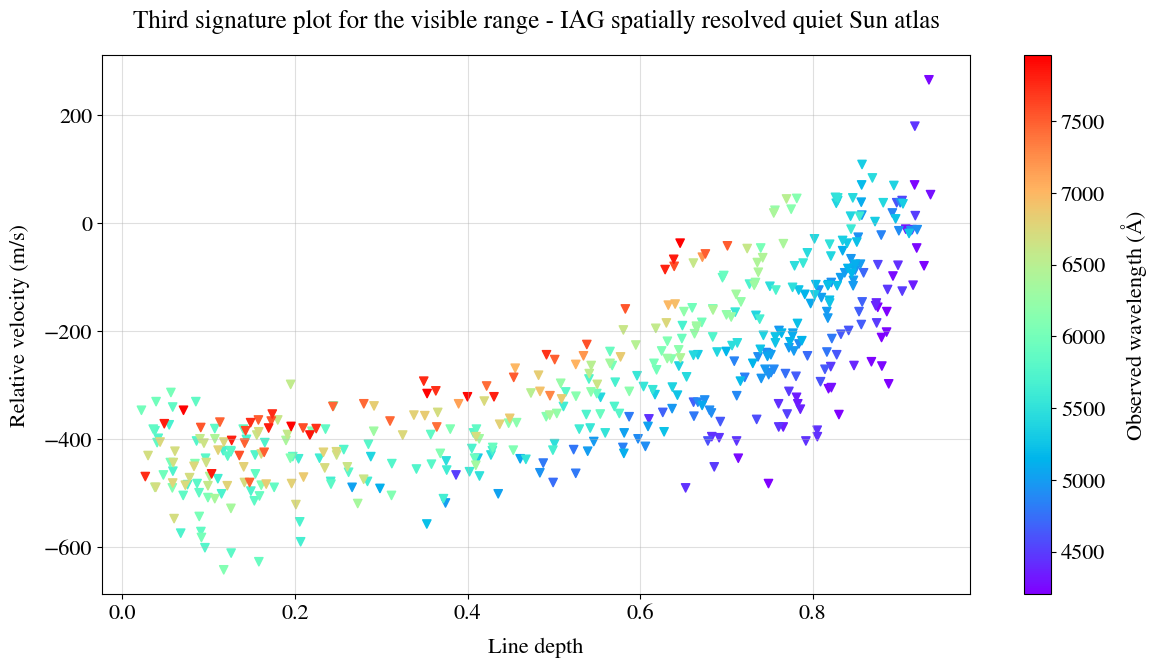

In [93]:
fig1, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Third signature plot for the visible range - IAG spatially resolved quiet Sun atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig1.savefig('GranulationPattern_SPA')

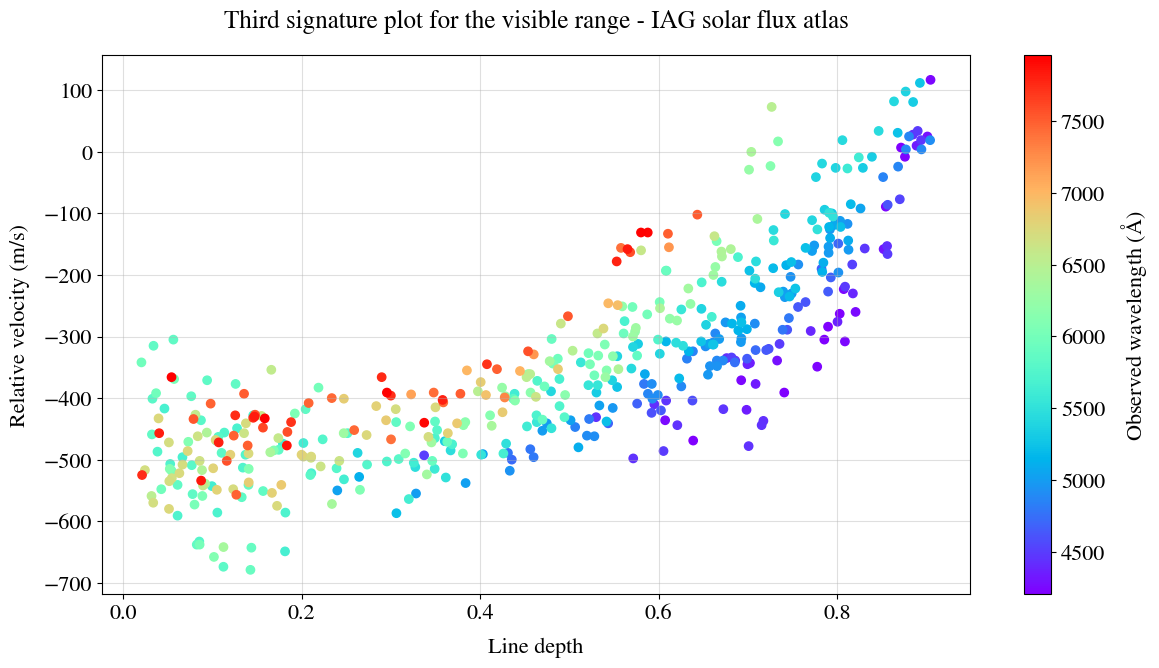

In [94]:
fig2, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(VIS_data['Line Depth'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Third signature plot for the visible range - IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig2.savefig('GranulationPattern_VIS')

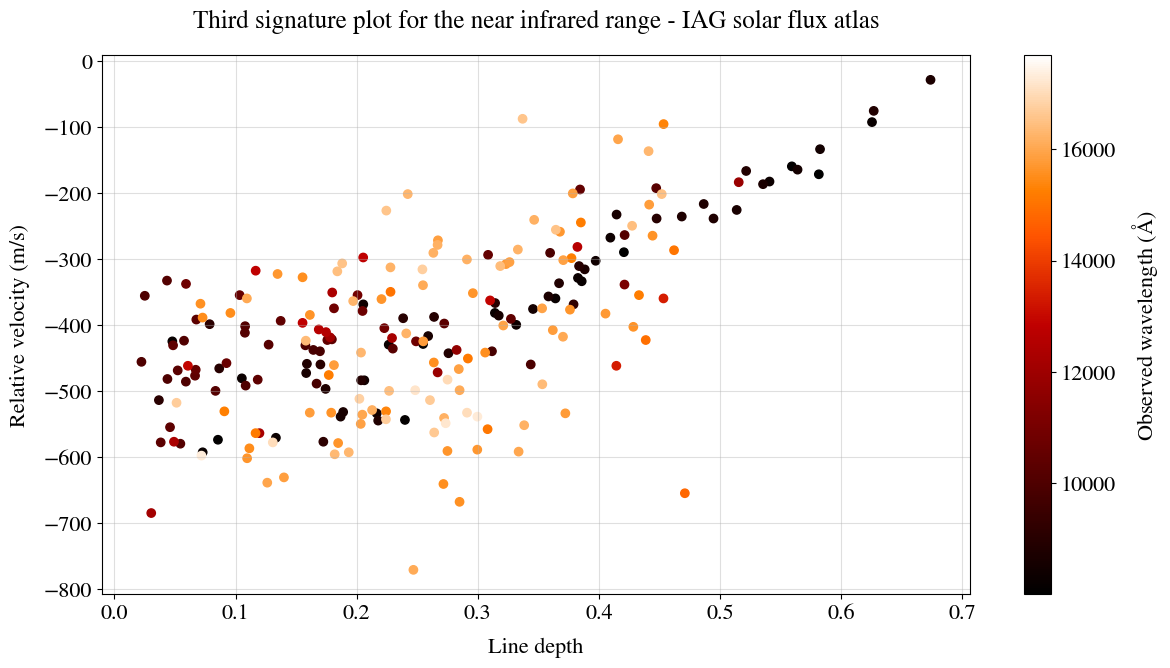

In [95]:
fig2, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(NIR_data['Line Depth'],NIR_data['Velocity'],c=NIR_data["Observed wavelength"],cmap='gist_heat',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Third signature plot for the near infrared range - IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig2.savefig('GranulationPattern_NIR')

## Characterization

### Ellwarth standard curve (just for the spatially resolved)

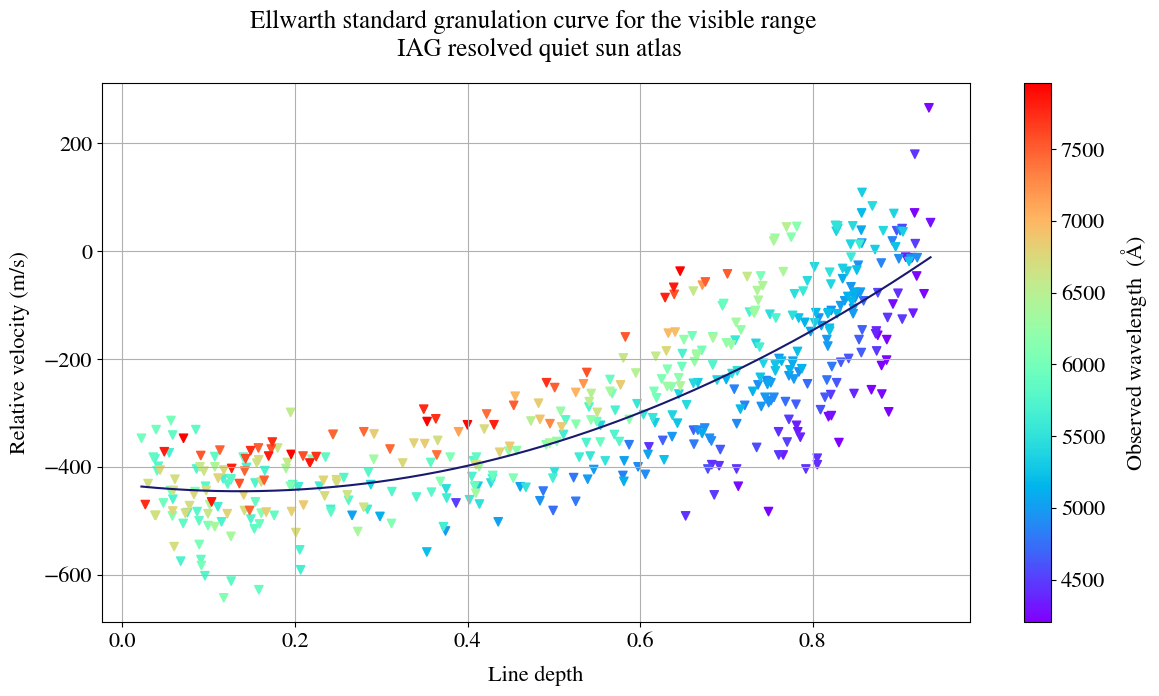

In [96]:
#The graphic just want to compared the less scattered points

fig4, ax = plt.subplots(1,1,figsize=(14,7))

#Made a polynomial first order fit
param, cov = np.polyfit(SPA_data['Line Depth'],SPA_data['Velocity'], 2,cov=True)
values_fit = np.linspace(min(SPA_data['Line Depth']), max(SPA_data['Line Depth']), len(SPA_data['Line Depth']))
fit = np.polyval(param,values_fit)

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength  $(\mathrm{\AA})$',labelpad=10)

ax.plot(values_fit,fit,color='midnightblue')

ax.set_title('Ellwarth standard granulation curve for the visible range \n IAG resolved quiet sun atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid()

# fig4.savefig('Standard curve_Ellwarth')


#### The deeper lines, coming from the spatially center of the sun, are affected by the differential rotation significantly than highest lines

## Wavelength-dependence of line depth for specific velocity

### Visible range

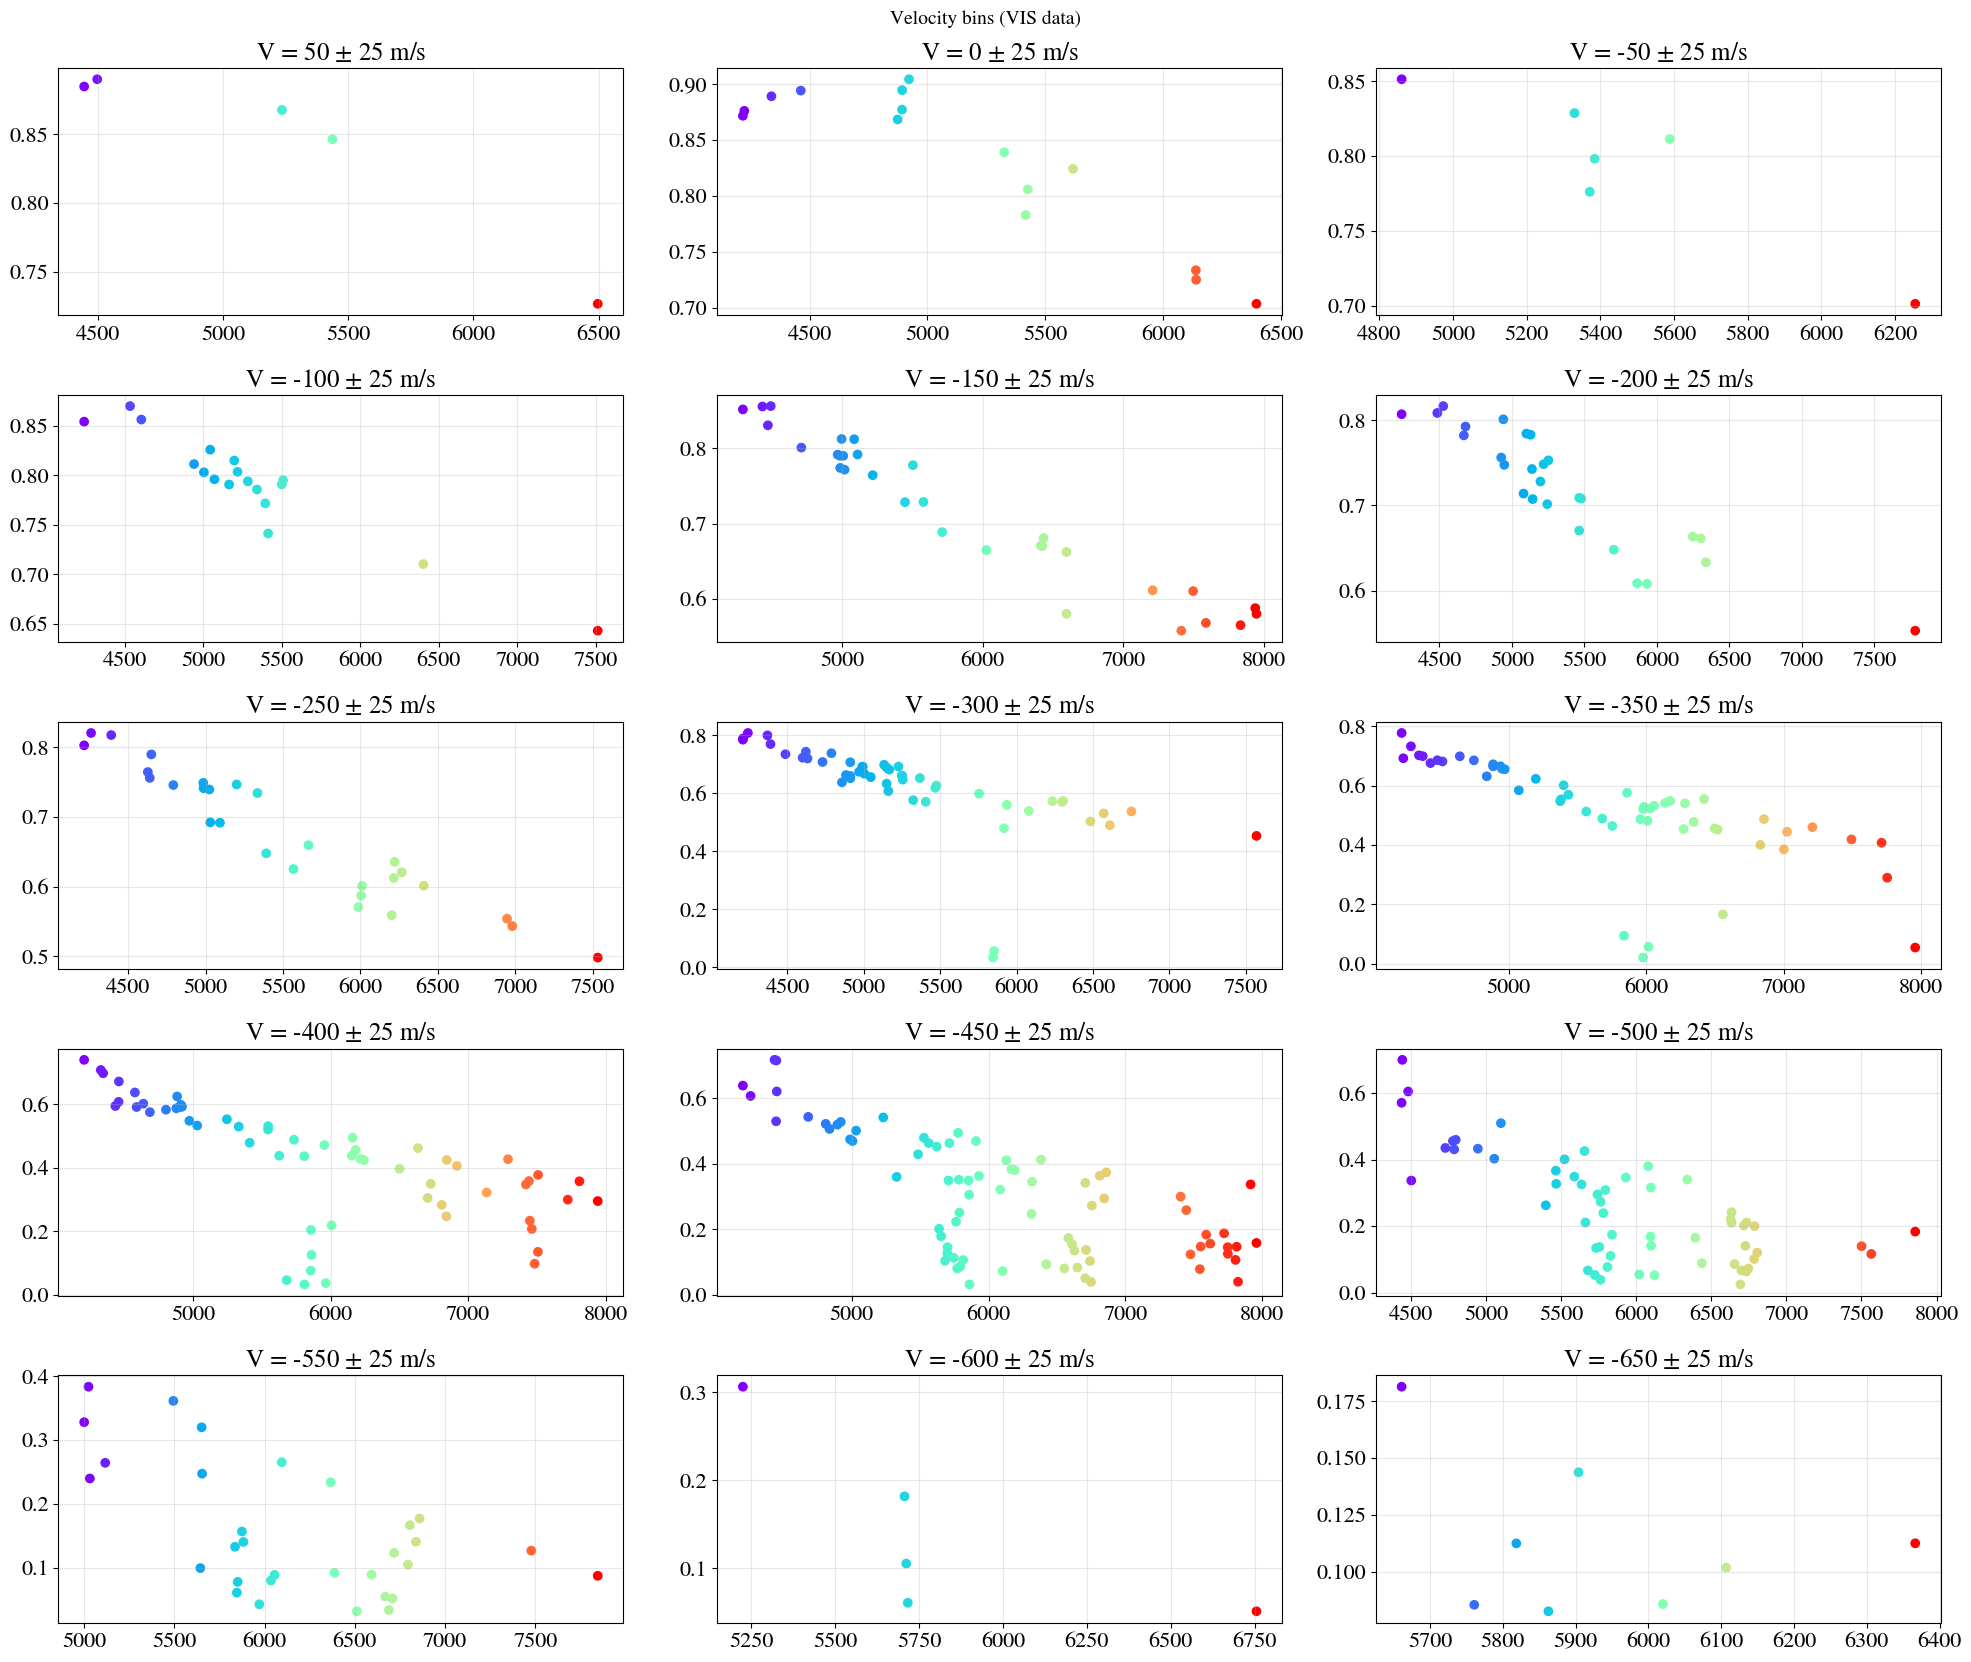

In [97]:
#Organize the dataframe wtih ascending velocities
VIS_listed = VIS_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_VIS_ = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_VIS_.append(VIS_listed[VIS_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_VIS_[i]['Observed wavelength'],1-velocity_VIS_[i]['Flux'],c=velocity_VIS_[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

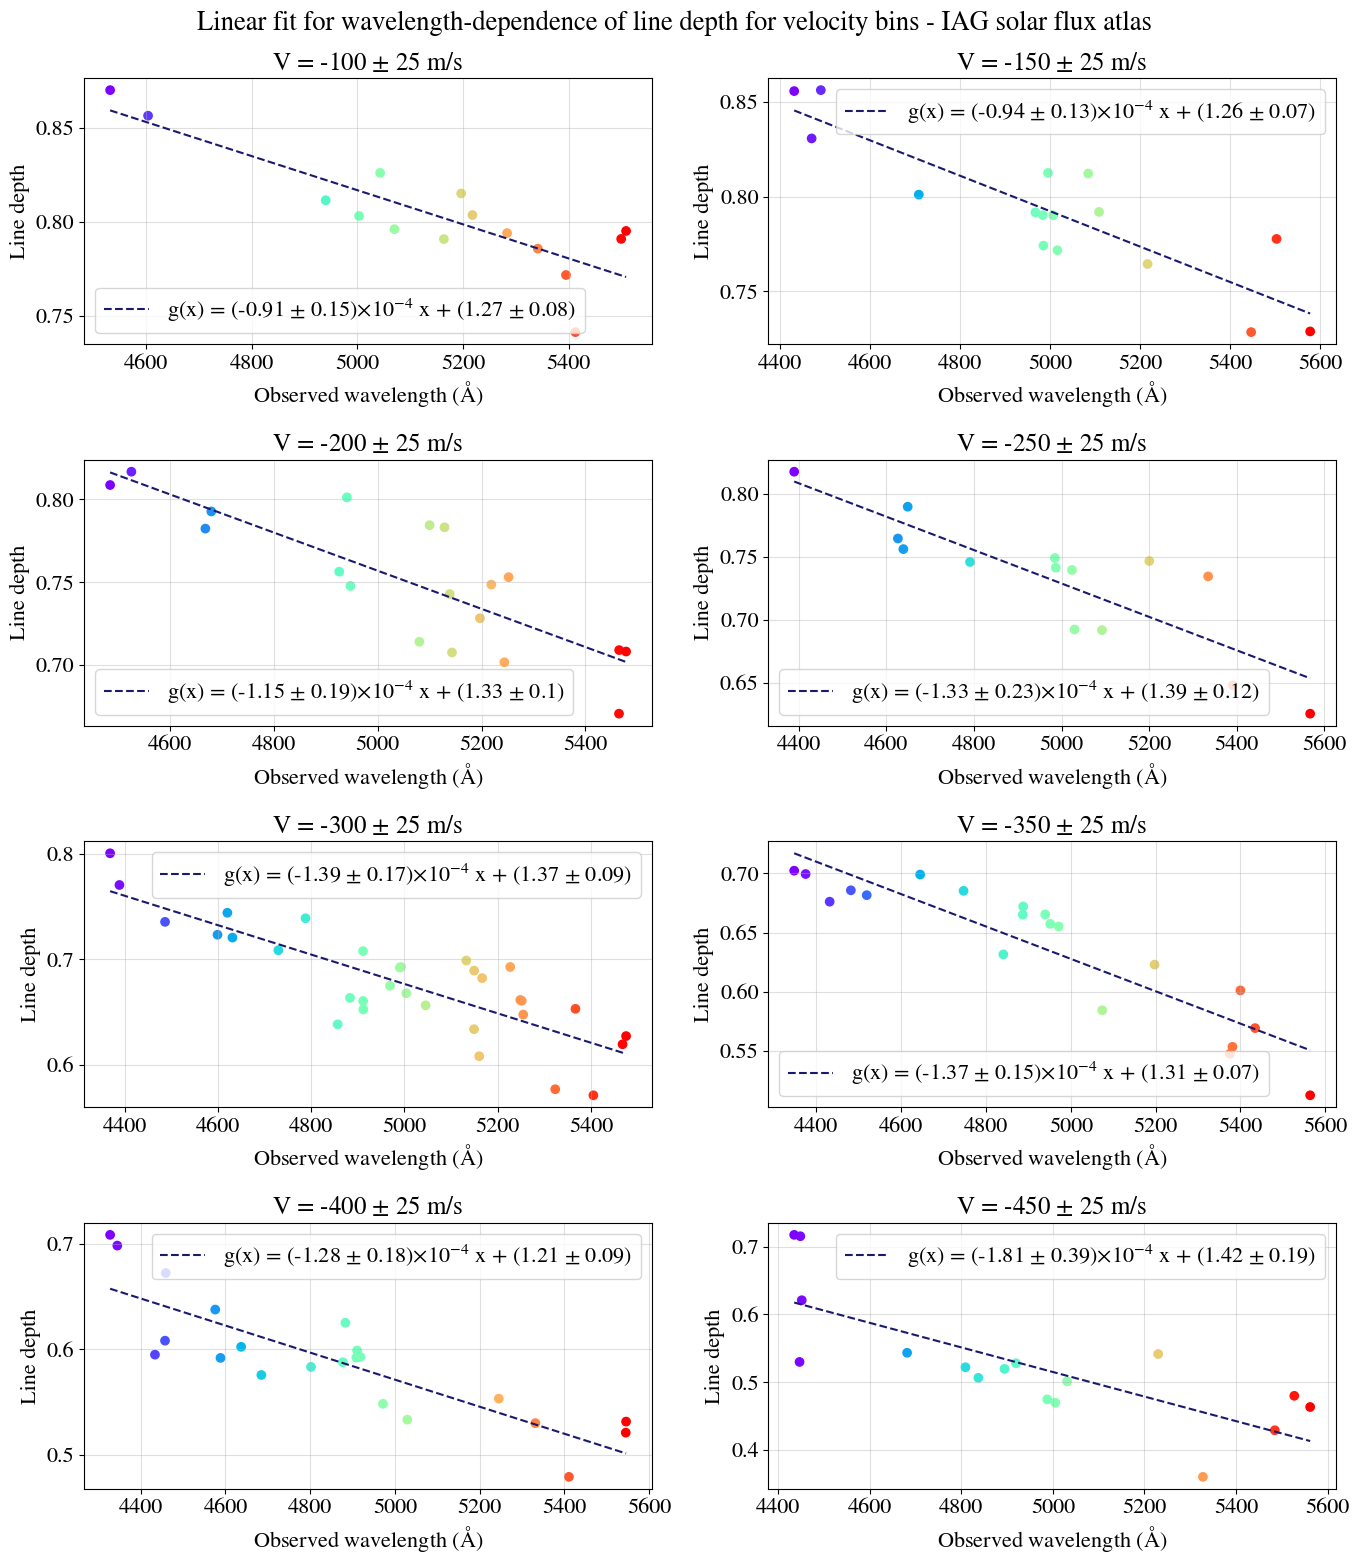

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_VIS = []
values_param_VIS = []
wave_VIS = []
cov_VIS = []
velocity_VIS = []

for i in range(3,11):
    #Reduce the scattered points to observe the values of slopes
    new_data = velocity_VIS_[i][velocity_VIS_[i]['Observed wavelength'].between(4300,5600, inclusive='neither')]
    velocity_VIS.append(velocity_VIS_[i])

    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Observed wavelength'],new_data['Line Depth'], 1,cov=True)
    values_fit = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))

    cov_VIS.append(pd.DataFrame(error))
    fits_VIS.append([values_fit,fit])
    values_param_VIS.append(pd.DataFrame(param))
    wave_VIS.append(new_data)

markers_new = markers[3:11]

#Parameters and their error
param_VIS = pd.concat(values_param_VIS,axis=1).T.reset_index(drop=True)
param_VIS.columns = ['Slope','Shift']
param_VIS['Error Slope'] = pd.concat(cov_VIS,axis=1).T.reset_index(drop=True)[0]
param_VIS['Error Shift'] = pd.concat(cov_VIS,axis=1).T.reset_index(drop=True)[1]
param_VIS['Velocity'] = markers_new

fig5, axes = plt.subplots(4, 2, figsize=(14, 16))
fig5.suptitle('Linear fit for wavelength-dependence of line depth for velocity bins - IAG solar flux atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_VIS):
        
        ax.scatter(wave_VIS[i]['Observed wavelength'],wave_VIS[i]['Line Depth'],c=wave_VIS[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_VIS[i][0],fits_VIS[i][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_VIS["Slope"].iloc[i]*1e4,2)} $\pm$ {round(param_VIS["Error Slope"].iloc[i]*1e4,2)})$\times 10^{{-4}}$ x + ({round(param_VIS["Shift"].iloc[i],2)} $\pm$ {round(param_VIS["Error Shift"].iloc[i],2)})')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_ylabel(r'Line depth')
        ax.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$')
        ax.grid(alpha=0.4)
        ax.legend()

    else:
        ax.set_visible(False)


plt.tight_layout()
# fig5.savefig('Velocity bins VIS')


In [99]:
param_VIS

,Slope,Shift,Error Slope,Error Shift,Velocity
0,-0.000091,1.270417,0.000015,0.079727,-100
1,-0.000094,1.260197,0.000013,0.067381,-150
2,-0.000115,1.334044,0.000019,0.098525,-200
3,-0.000133,1.392099,0.000023,0.116467,-250
4,-0.000139,1.372480,0.000017,0.087445,-300
5,-0.000137,1.310685,0.000015,0.074455,-350
6,-0.000128,1.211962,0.000018,0.086642,-400
7,-0.000181,1.421268,0.000039,0.194761,-450


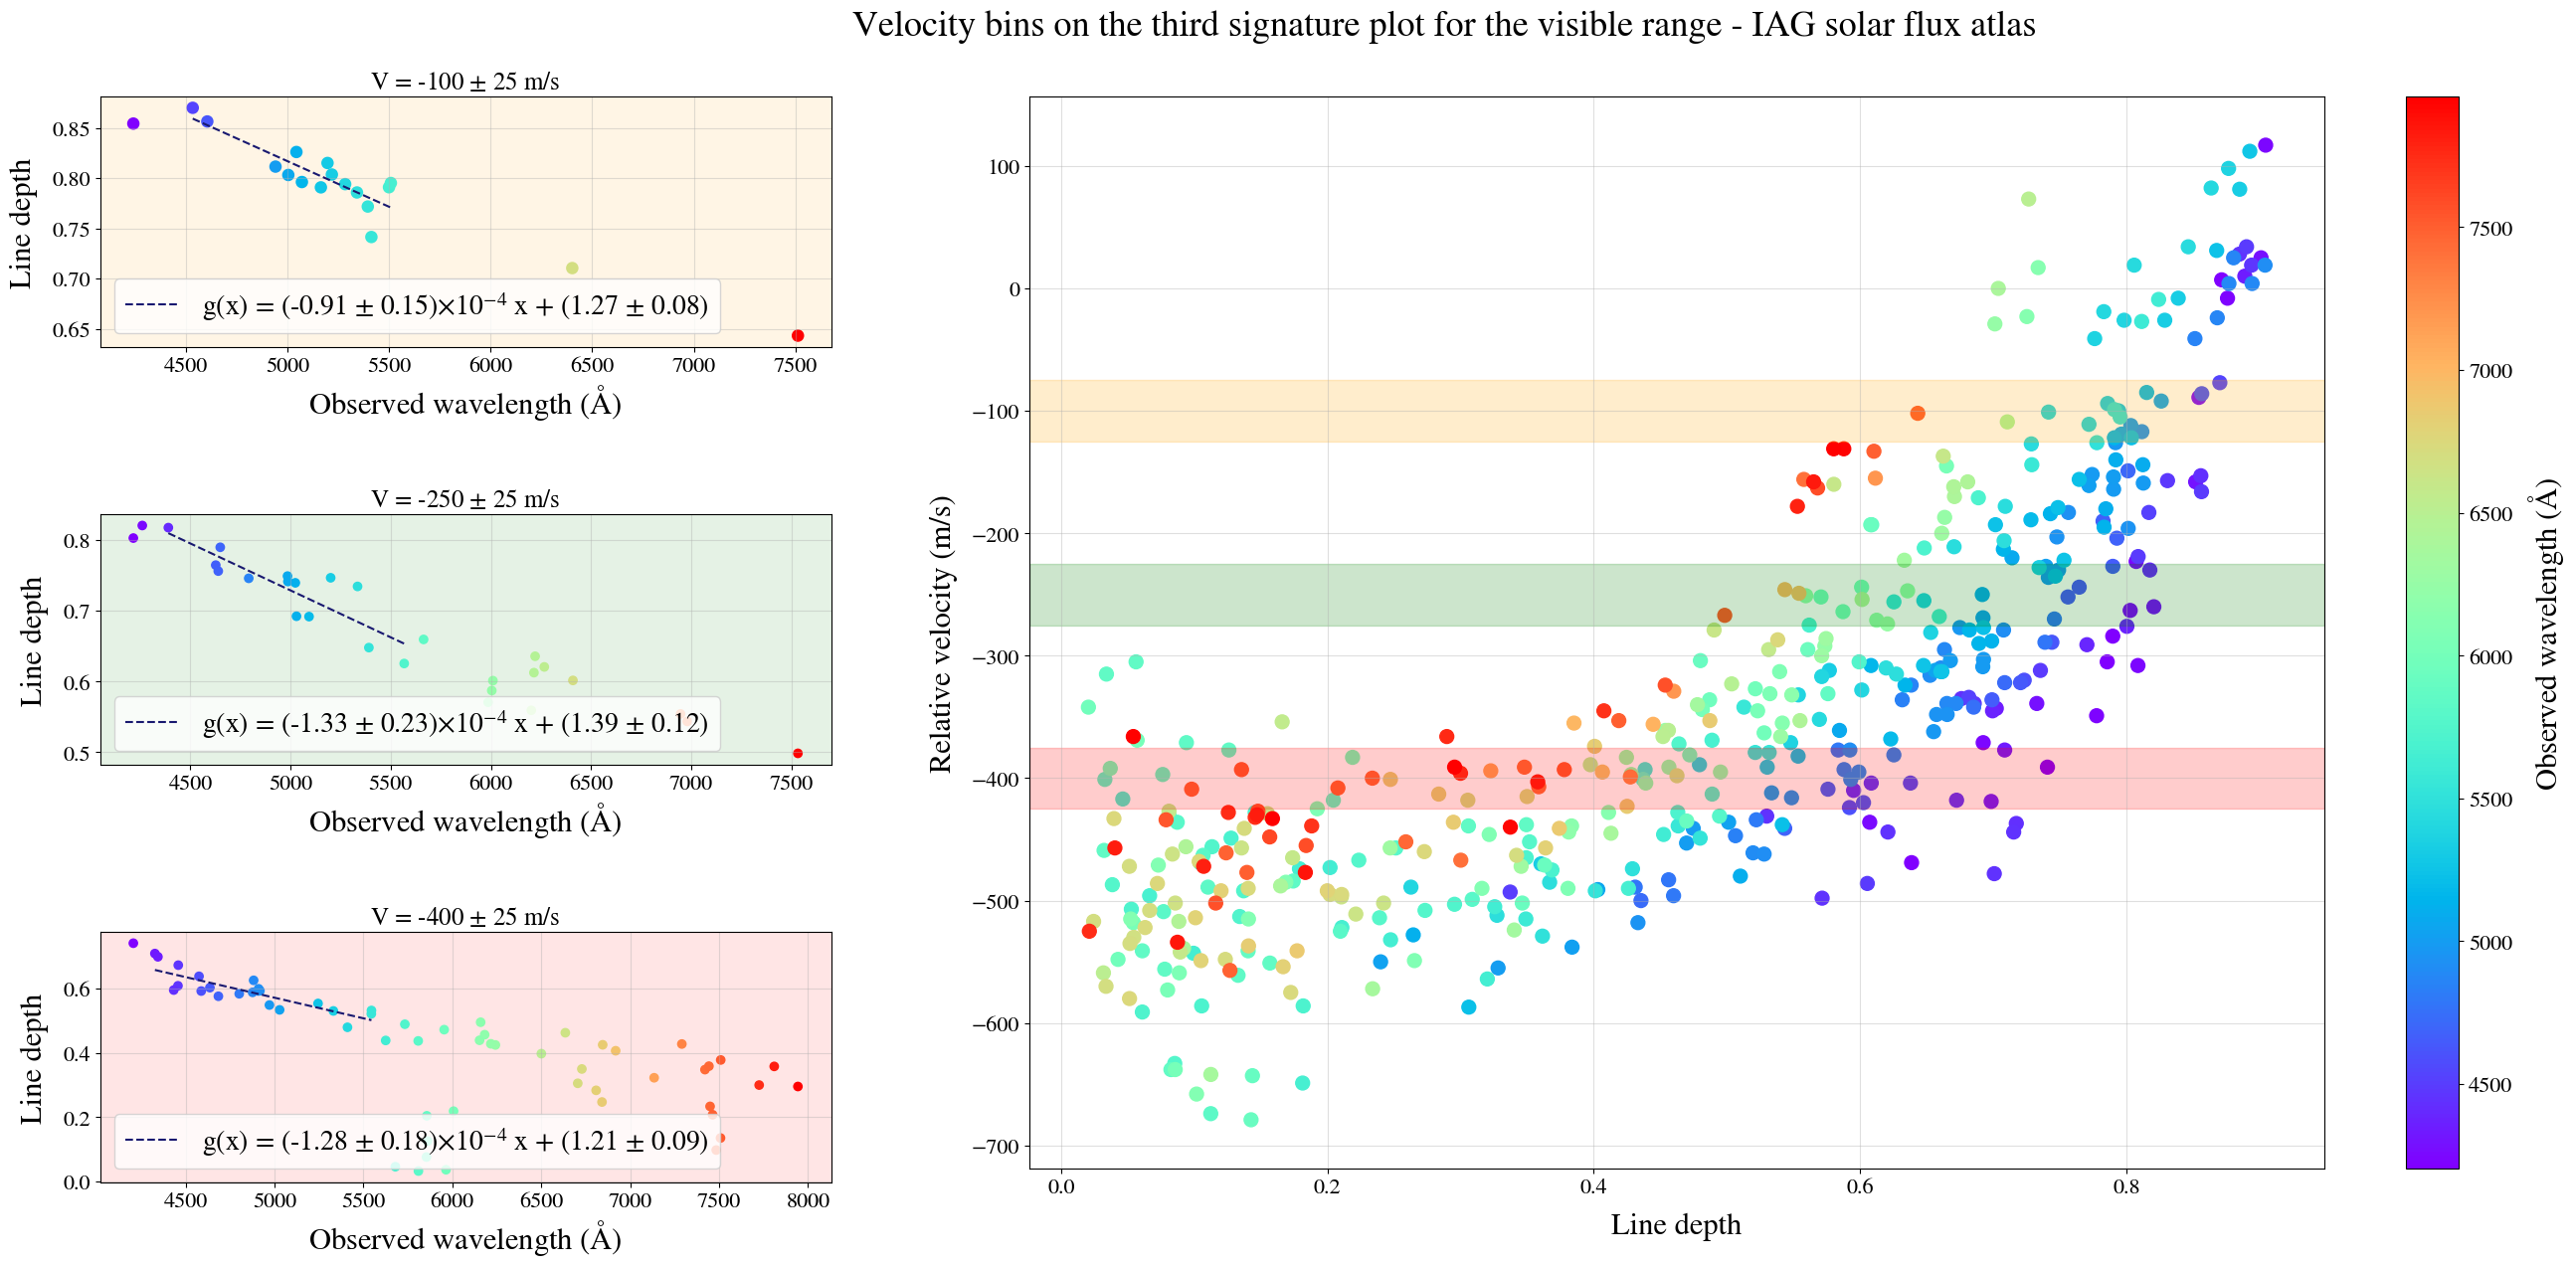

In [100]:
#Graph with the velocity bins remarked
fig, ax = plt.subplots(figsize=(21, 14))
scatter = ax.scatter(VIS_data['Line Depth'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o',s=100)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10,fontsize=22)

ax.set_title('Velocity bins on the third signature plot for the visible range - IAG solar flux atlas',fontsize=26,x=0.32, y=1.05)
ax.set_xlabel(r'Line depth',labelpad=10,fontsize=22)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10,fontsize=22)
ax.grid(alpha=0.4)

#Big figure with velocity bins
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Position and size [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.32, 0.7, 0.35, 0.18])
ax_insetj = fig.add_axes([-0.32, 0.4, 0.35, 0.18])
ax_insetk = fig.add_axes([-0.32, 0.1, 0.35, 0.18])

# Graph the zoom
i=0
ax_inseti.scatter(velocity_VIS[i]['Observed wavelength'],velocity_VIS[i]['Line Depth'],c=velocity_VIS[i]["Observed wavelength"],cmap='rainbow',lw=3)
ax_inseti.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
ax_inseti.set_ylabel(r'Line depth',labelpad=10,fontsize=22)
ax_inseti.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_inseti.plot(fits_VIS[i][0],fits_VIS[i][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_VIS["Slope"].iloc[i]*1e4,2)} $\pm$ {round(param_VIS["Error Slope"].iloc[i]*1e4,2)})$\times 10^{{-4}}$ x + ({round(param_VIS["Shift"].iloc[i],2)} $\pm$ {round(param_VIS["Error Shift"].iloc[i],2)})')
ax_inseti.grid(alpha=0.4)
ax_inseti.legend(fontsize=20)

j=3
ax_insetj.scatter(velocity_VIS[j]['Observed wavelength'],velocity_VIS[j]['Line Depth'],c=velocity_VIS[j]["Observed wavelength"],cmap='rainbow')
ax_insetj.set_title(f'V = {markers_new[j]} $\pm$ 25 m/s')
ax_insetj.set_ylabel(r'Line depth',labelpad=10,fontsize=22)
ax_insetj.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_insetj.plot(fits_VIS[j][0],fits_VIS[j][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_VIS["Slope"].iloc[j]*1e4,2)} $\pm$ {round(param_VIS["Error Slope"].iloc[j]*1e4,2)})$\times 10^{{-4}}$ x + ({round(param_VIS["Shift"].iloc[j],2)} $\pm$ {round(param_VIS["Error Shift"].iloc[j],2)})')
ax_insetj.grid(alpha=0.4)
ax_insetj.legend(fontsize=20)

k=6
ax_insetk.scatter(velocity_VIS[k]['Observed wavelength'],velocity_VIS[k]['Line Depth'],c=velocity_VIS[k]["Observed wavelength"],cmap='rainbow')
ax_insetk.set_title(f'V = {markers_new[k]} $\pm$ 25 m/s')
ax_insetk.set_ylabel(r'Line depth',labelpad=10,fontsize=22)
ax_insetk.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_insetk.plot(fits_VIS[k][0],fits_VIS[k][1],linestyle='--',color='midnightblue',
            label=rf'g(x) = ({round(param_VIS["Slope"].iloc[k]*1e4,2)} $\pm$ {round(param_VIS["Error Slope"].iloc[k]*1e4,2)})$\times 10^{{-4}}$ x + ({round(param_VIS["Shift"].iloc[k],2)} $\pm$ {round(param_VIS["Error Shift"].iloc[k],2)})')
ax_insetk.grid(alpha=0.4)
ax_insetk.legend(fontsize=20)


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers_new[i]-25, markers_new[i]+25, alpha=0.2, color='orange')
ax.axhspan(markers_new[j]-25, markers_new[j]+25, alpha=0.2, color='green')
ax.axhspan(markers_new[k]-25, markers_new[k]+25, alpha=0.2, color='red')

ax_inseti.set_facecolor(color=('orange', 0.1))
ax_insetj.set_facecolor(color=('green', 0.1))
ax_insetk.set_facecolor(color=('red', 0.1))

# fig.savefig('Velocity bins VIS_plot', bbox_inches='tight')

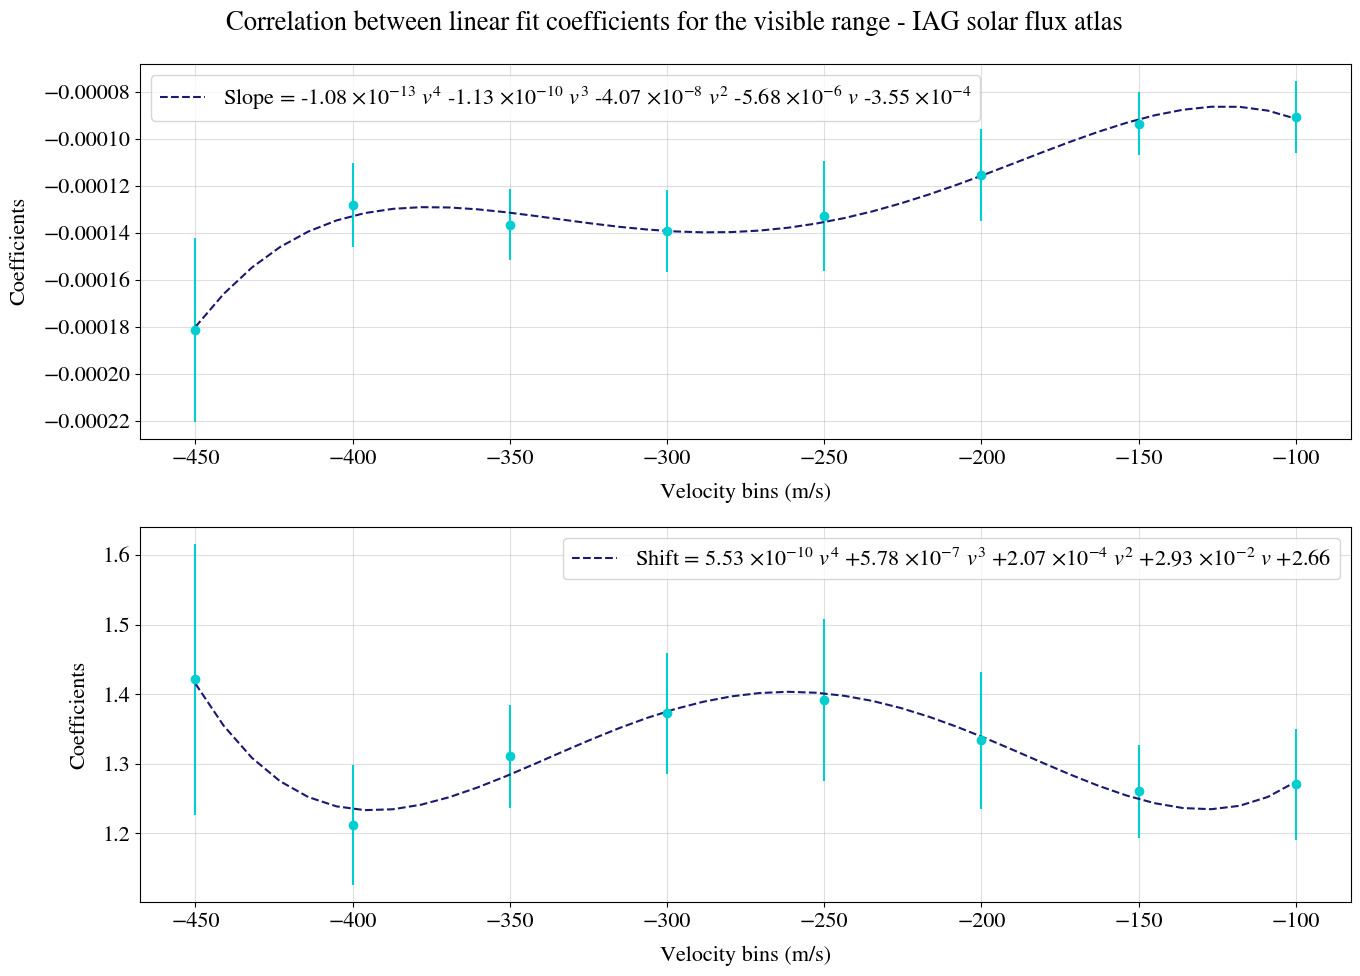

In [101]:
fig3, axes = plt.subplots(2,1,figsize=(14,10))
ax1 = axes[0]
ax2 = axes[1]

ax1.errorbar(param_VIS['Velocity'],param_VIS['Slope'],yerr=param_VIS['Error Slope'],fmt='o',c='darkturquoise')
ax2.errorbar(param_VIS['Velocity'],param_VIS['Shift'],yerr=param_VIS['Error Shift'],fmt='o',c='darkturquoise')

#Made a polynomial first order fit
param1, cov1 = np.polyfit(param_VIS['Velocity'],param_VIS['Slope'], 4,cov=True)
values_fit1 = np.linspace(min(param_VIS['Velocity']), max(param_VIS['Velocity']), 40)
fit1 = np.polyval(param1,values_fit1)

ax1.plot(values_fit1,fit1,c='midnightblue',linestyle='--',label=rf'Slope = -{round(param1[0]*-1e13,2)} $\times 10^{{-13}}$ $v^4$ -{round(param1[1]*-1e10,2)} $\times 10^{{-10}}$ $v^3$ -{round(param1[2]*-1e8,2)} $\times 10^{{-8}}$ $v^2$ -{round(param1[3]*-1e6,2)} $\times 10^{{-6}}$ $v$ -{round(param1[4]*-1e4,2)} $\times 10^{{-4}}$')

# Made a polynomial first order fit
param2, cov2 = np.polyfit(param_VIS['Velocity'] ,param_VIS['Shift'], 4,cov=True)
values_fit2 = np.linspace(min(param_VIS['Velocity']), max(param_VIS['Velocity']), 40)
fit2 = np.polyval(param2,values_fit2)

ax2.plot(values_fit2,fit2,c='midnightblue',linestyle='--',label=rf'Shift = {round(param2[0]*1e10,2)} $\times 10^{{-10}}$ $v^4$ +{round(param2[1]*1e7,2)} $\times 10^{{-7}}$ $v^3$ +{round(param2[2]*1e4,2)} $\times 10^{{-4}}$ $v^2$ +{round(param2[3]*1e2,2)} $\times 10^{{-2}}$ $v$ +{round(param2[4],2)}')

fig3.suptitle('Correlation between linear fit coefficients for the visible range - IAG solar flux atlas')

ax1.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax2.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax1.set_ylabel(r'Coefficients',labelpad=10)
ax2.set_ylabel(r'Coefficients',labelpad=10)
ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
ax1.legend()
ax2.legend()
fig3.tight_layout()

# fig3.savefig('velocity coeficients VIS')

### Spatial data

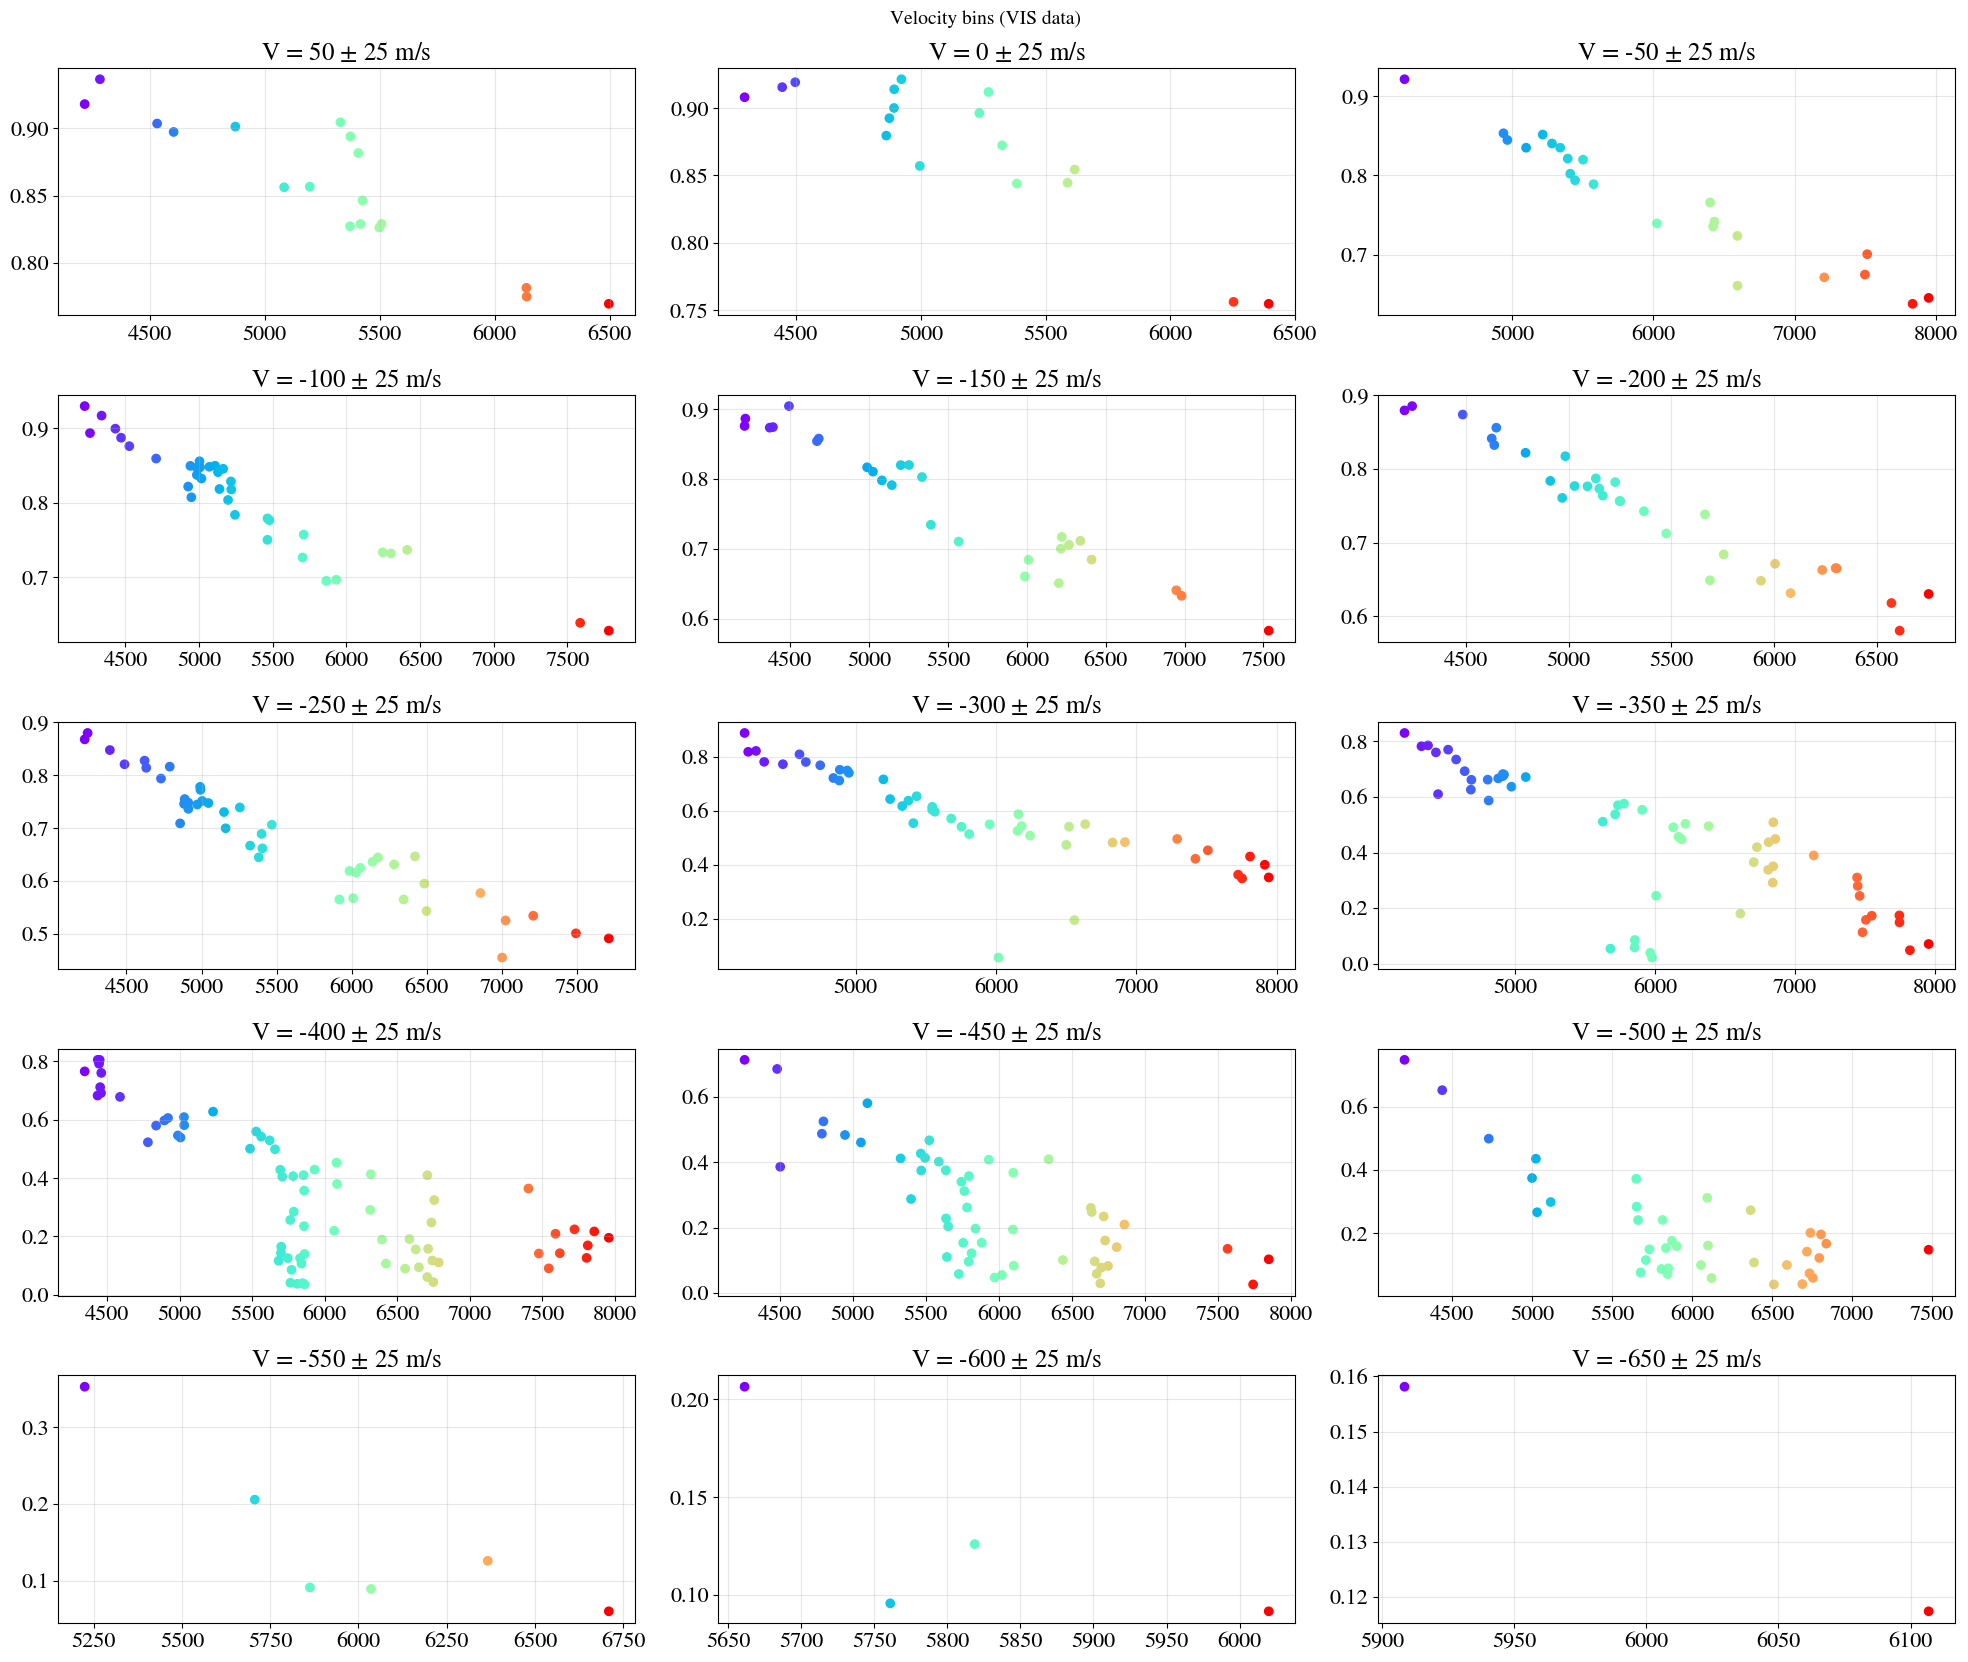

In [102]:
#Organize the dataframe wtih ascending velocities
SPA_listed = SPA_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_SPA_ = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_SPA_.append(SPA_listed[SPA_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_SPA_[i]['Observed wavelength'],1-velocity_SPA_[i]['Flux'],c=velocity_SPA_[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


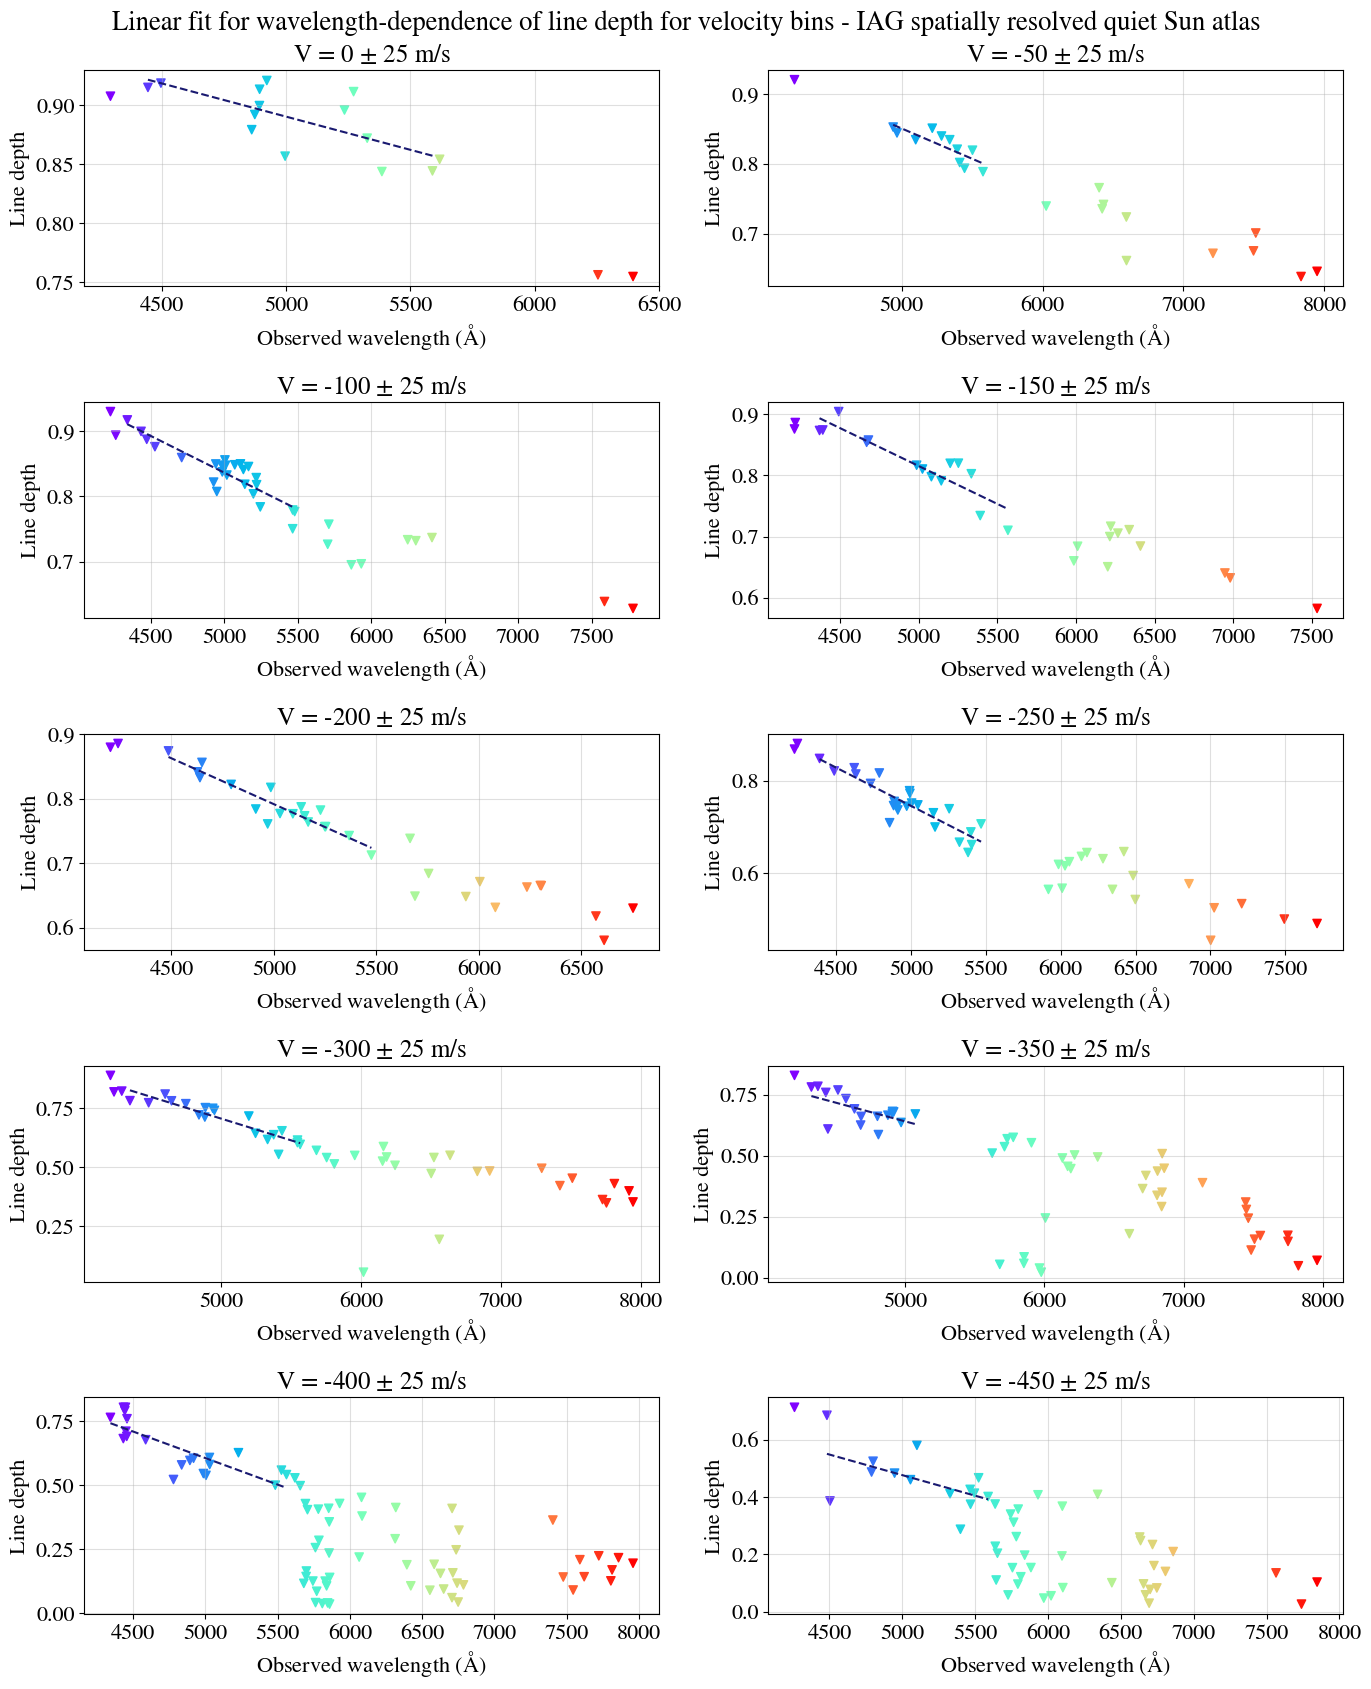

In [103]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []
cov_SPA = []
velocity_SPA = []

for i in range(1,11):
    new_data = velocity_SPA_[i][velocity_SPA_[i]['Observed wavelength'].between(4300,5600, inclusive='neither')]
    velocity_SPA.append(velocity_SPA_[i])
    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Observed wavelength'], new_data['Line Depth'],1,cov=True)
    values_fit = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))

    cov_SPA.append(pd.DataFrame(error))
    fits_SPA.append([values_fit,fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

markers_new = markers[1:11]

#Parameters and their error
param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
param_SPA.columns = ['Slope','Shift']
param_SPA['Error Slope'] = pd.concat(cov_SPA,axis=1).T.reset_index(drop=True)[0]
param_SPA['Error Shift'] = pd.concat(cov_SPA,axis=1).T.reset_index(drop=True)[1]
param_SPA['Velocity'] = markers_new

fig5, axes = plt.subplots(6, 2, figsize=(14, 20))
fig5.suptitle('Linear fit for wavelength-dependence of line depth for velocity bins - IAG spatially resolved quiet Sun atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(velocity_SPA[i]['Observed wavelength'],velocity_SPA[i]['Line Depth'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow',marker='v')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],linestyle='--',color='midnightblue')
                # label=rf'g(x) = ({round(param_SPA["Slope"].iloc[i]*1e4,2)} $\pm$ {round(param_SPA["Error Slope"].iloc[i]*1e4,2)})$\times 10^{{-4}}$ x + ({round(param_SPA["Shift"].iloc[i],2)} $\pm$ {round(param_SPA["Error Shift"].iloc[i],2)})')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_ylabel(r'Line depth')
        ax.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$')
        ax.grid(alpha=0.4)
        # ax.legend()

    else:
        ax.set_visible(False)

fig5.tight_layout()
plt.show()

# fig5.savefig('Velocity bins SPA')

In [104]:
param_SPA

,Slope,Shift,Error Slope,Error Shift,Velocity
0,-0.000056,1.172029,0.000018,0.092365,0
1,-0.000087,1.284067,0.000021,0.108748,-50
2,-0.000112,1.395371,0.000012,0.058486,-100
3,-0.000124,1.432798,0.000017,0.084250,-150
4,-0.000142,1.502800,0.000013,0.065833,-200
5,-0.000165,1.571222,0.000018,0.089077,-250
6,-0.000184,1.623338,0.000019,0.097136,-300
7,-0.000154,1.412965,0.000055,0.258360,-350
8,-0.000208,1.645521,0.000033,0.161773,-400
9,-0.000144,1.195229,0.000060,0.309442,-450


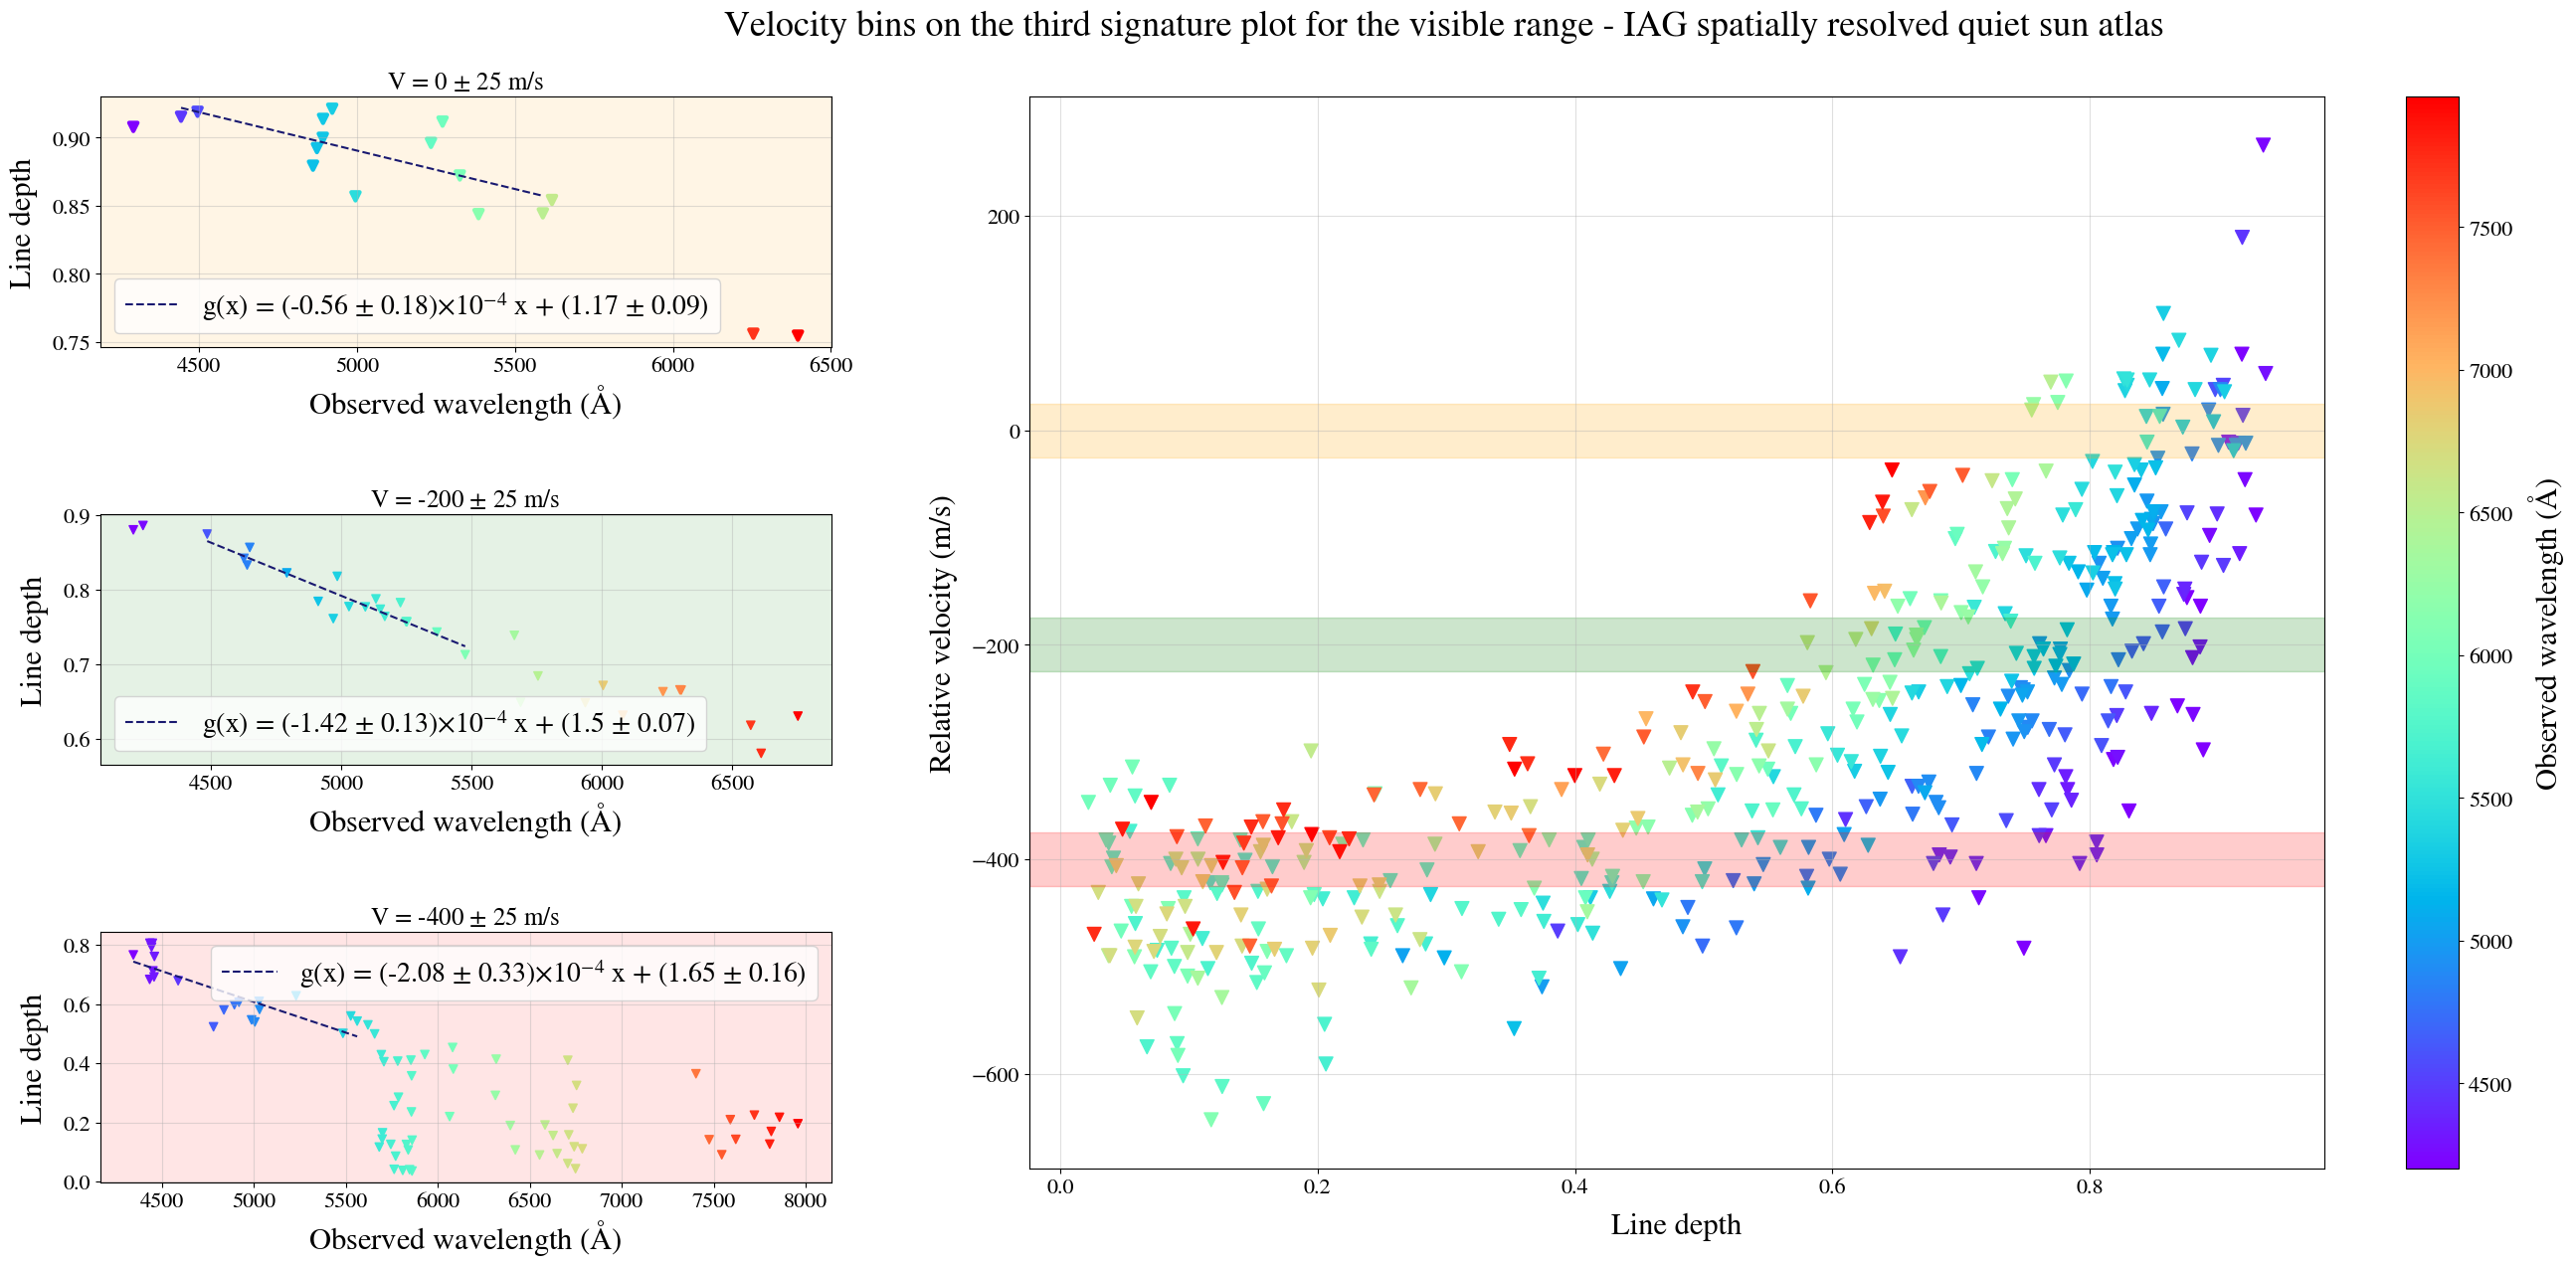

In [105]:
#Graph with the velocity bins remarked
fig, ax = plt.subplots(figsize=(21, 14))
scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v',s=100)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10,fontsize=22)

ax.set_title('Velocity bins on the third signature plot for the visible range - IAG spatially resolved quiet sun atlas',fontsize=26,x=0.32, y=1.05)
ax.set_xlabel(r'Line depth',labelpad=10,fontsize=22)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10,fontsize=22)
ax.grid(alpha=0.4)

#Big figure with velocity bins
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Position and size [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.32, 0.7, 0.35, 0.18])
ax_insetj = fig.add_axes([-0.32, 0.4, 0.35, 0.18])
ax_insetk = fig.add_axes([-0.32, 0.1, 0.35, 0.18])

# Graph the zoom
i=0
ax_inseti.scatter(velocity_SPA[i]['Observed wavelength'],velocity_SPA[i]['Line Depth'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow',lw=3,marker='v')
ax_inseti.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
ax_inseti.set_ylabel(r'Line depth',labelpad=10,fontsize=22)
ax_inseti.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_inseti.plot(fits_SPA[i][0],fits_SPA[i][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_SPA["Slope"].iloc[i]*1e4,2)} $\pm$ {round(param_SPA["Error Slope"].iloc[i]*1e4,2)})$\times 10^{{-4}}$ x + ({round(param_SPA["Shift"].iloc[i],2)} $\pm$ {round(param_SPA["Error Shift"].iloc[i],2)})')
ax_inseti.grid(alpha=0.4)
ax_inseti.legend(fontsize=20)

j=4
ax_insetj.scatter(velocity_SPA[j]['Observed wavelength'],velocity_SPA[j]['Line Depth'],c=velocity_SPA[j]["Observed wavelength"],cmap='rainbow',marker='v')
ax_insetj.set_title(f'V = {markers_new[j]} $\pm$ 25 m/s')
ax_insetj.set_ylabel(r'Line depth',labelpad=10,fontsize=22)
ax_insetj.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_insetj.plot(fits_SPA[j][0],fits_SPA[j][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_SPA["Slope"].iloc[j]*1e4,2)} $\pm$ {round(param_SPA["Error Slope"].iloc[j]*1e4,2)})$\times 10^{{-4}}$ x + ({round(param_SPA["Shift"].iloc[j],2)} $\pm$ {round(param_SPA["Error Shift"].iloc[j],2)})')
ax_insetj.grid(alpha=0.4)
ax_insetj.legend(fontsize=20)

k=8
ax_insetk.scatter(velocity_SPA[k]['Observed wavelength'],velocity_SPA[k]['Line Depth'],c=velocity_SPA[k]["Observed wavelength"],cmap='rainbow',marker='v')
ax_insetk.set_title(f'V = {markers_new[k]} $\pm$ 25 m/s')
ax_insetk.set_ylabel(r'Line depth',labelpad=10,fontsize=22)
ax_insetk.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_insetk.plot(fits_SPA[k][0],fits_SPA[k][1],linestyle='--',color='midnightblue',
            label=rf'g(x) = ({round(param_SPA["Slope"].iloc[k]*1e4,2)} $\pm$ {round(param_SPA["Error Slope"].iloc[k]*1e4,2)})$\times 10^{{-4}}$ x + ({round(param_SPA["Shift"].iloc[k],2)} $\pm$ {round(param_SPA["Error Shift"].iloc[k],2)})')
ax_insetk.grid(alpha=0.4)
ax_insetk.legend(fontsize=20)


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers_new[i]-25, markers_new[i]+25, alpha=0.2, color='orange')
ax.axhspan(markers_new[j]-25, markers_new[j]+25, alpha=0.2, color='green')
ax.axhspan(markers_new[k]-25, markers_new[k]+25, alpha=0.2, color='red')

ax_inseti.set_facecolor(color=('orange', 0.1))
ax_insetj.set_facecolor(color=('green', 0.1))
ax_insetk.set_facecolor(color=('red', 0.1))

# fig.savefig('Velocity bins SPA_plot', bbox_inches='tight')

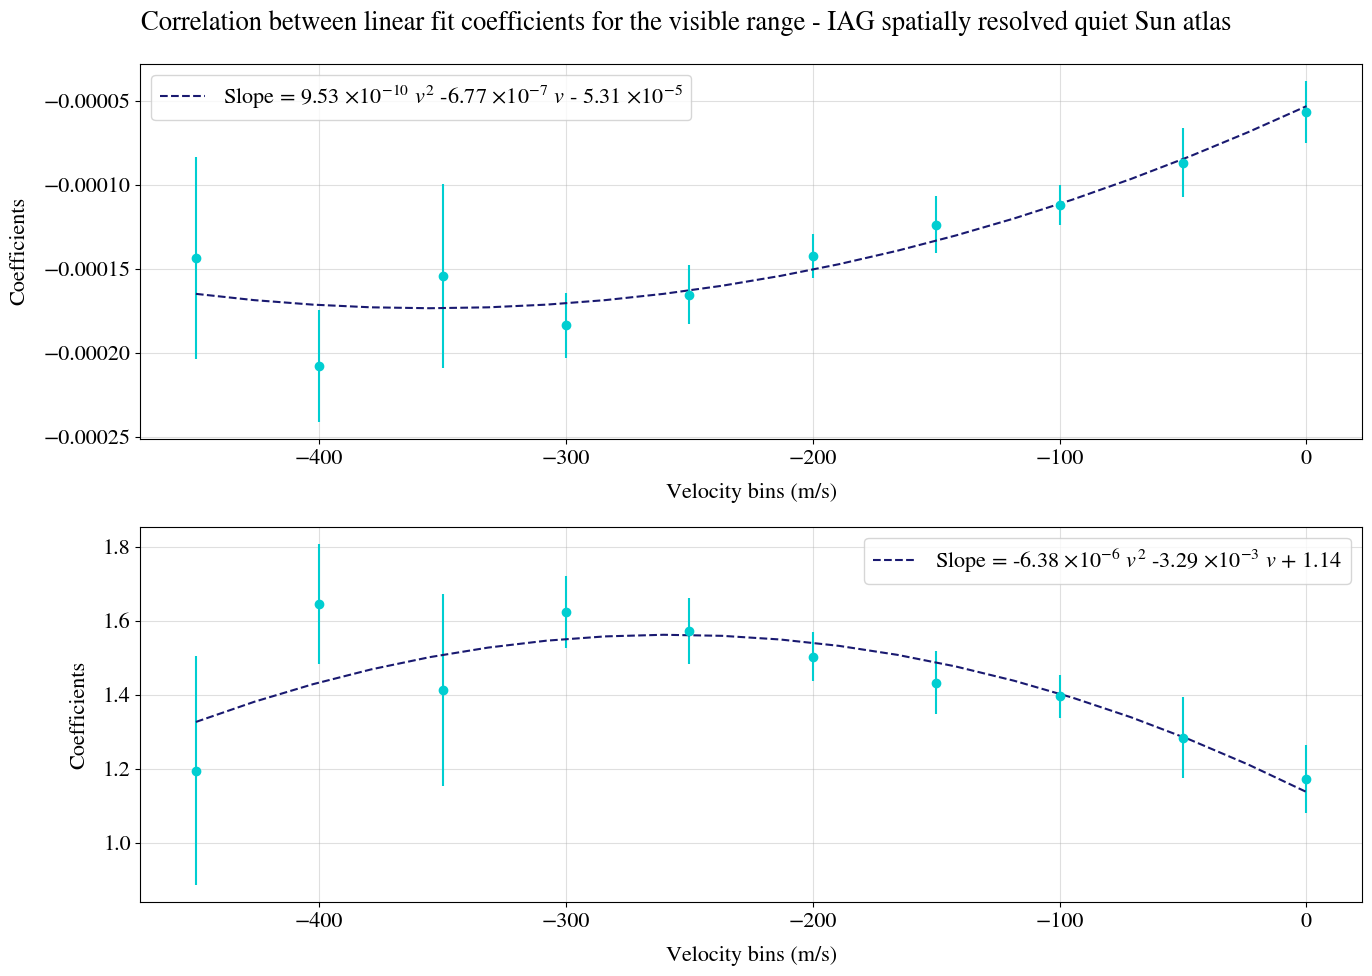

In [106]:
fig3, axes = plt.subplots(2,1,figsize=(14,10))
ax1 = axes[0]
ax2 = axes[1]

ax1.errorbar(param_SPA['Velocity'],param_SPA['Slope'],yerr=param_SPA['Error Slope'],fmt='o',c='darkturquoise')
ax2.errorbar(param_SPA['Velocity'],param_SPA['Shift'],yerr=param_SPA['Error Shift'],fmt='o',c='darkturquoise')

#Made a polynomial first order fit
param1, cov1 = np.polyfit(param_SPA['Velocity'],param_SPA['Slope'], 2,cov=True)
values_fit1 = np.linspace(min(param_SPA['Velocity']), max(param_SPA['Velocity']), 20)
fit1 = np.polyval(param1,values_fit1)

ax1.plot(values_fit1,fit1,linestyle='--',c='midnightblue',label=rf'Slope = {round(param1[0]*1e10,2)} $\times 10^{{-10}}$ $v^2$ -{round(param1[1]*1e7,2)} $\times 10^{{-7}}$ $v$ - {round(param1[2]*-1e5,2)} $\times 10^{{-5}}$')

# Made a polynomial first order fit
param2, cov2 = np.polyfit(param_SPA['Velocity'] ,param_SPA['Shift'], 2,cov=True)
values_fit2 = np.linspace(min(param_SPA['Velocity']), max(param_SPA['Velocity']), 20)
fit2 = np.polyval(param2,values_fit2)

ax2.plot(values_fit2,fit2,linestyle='--',c='midnightblue',label=rf'Slope = -{round(param2[0]*-1e6,2)} $\times 10^{{-6}}$ $v^2$ -{round(param2[1]*-1e3,2)} $\times 10^{{-3}}$ $v$ + {round(param2[2],2)}')

fig3.suptitle('Correlation between linear fit coefficients for the visible range - IAG spatially resolved quiet Sun atlas')

ax1.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax2.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax1.set_ylabel(r'Coefficients',labelpad=10)
ax2.set_ylabel(r'Coefficients',labelpad=10)
ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
ax1.legend()
ax2.legend()
fig3.tight_layout()

# fig3.savefig('velocity coeficients SPA')

In [107]:
param2

array([-6.37895073e-06, -3.29076934e-03,  1.13761100e+00])

### NIR data

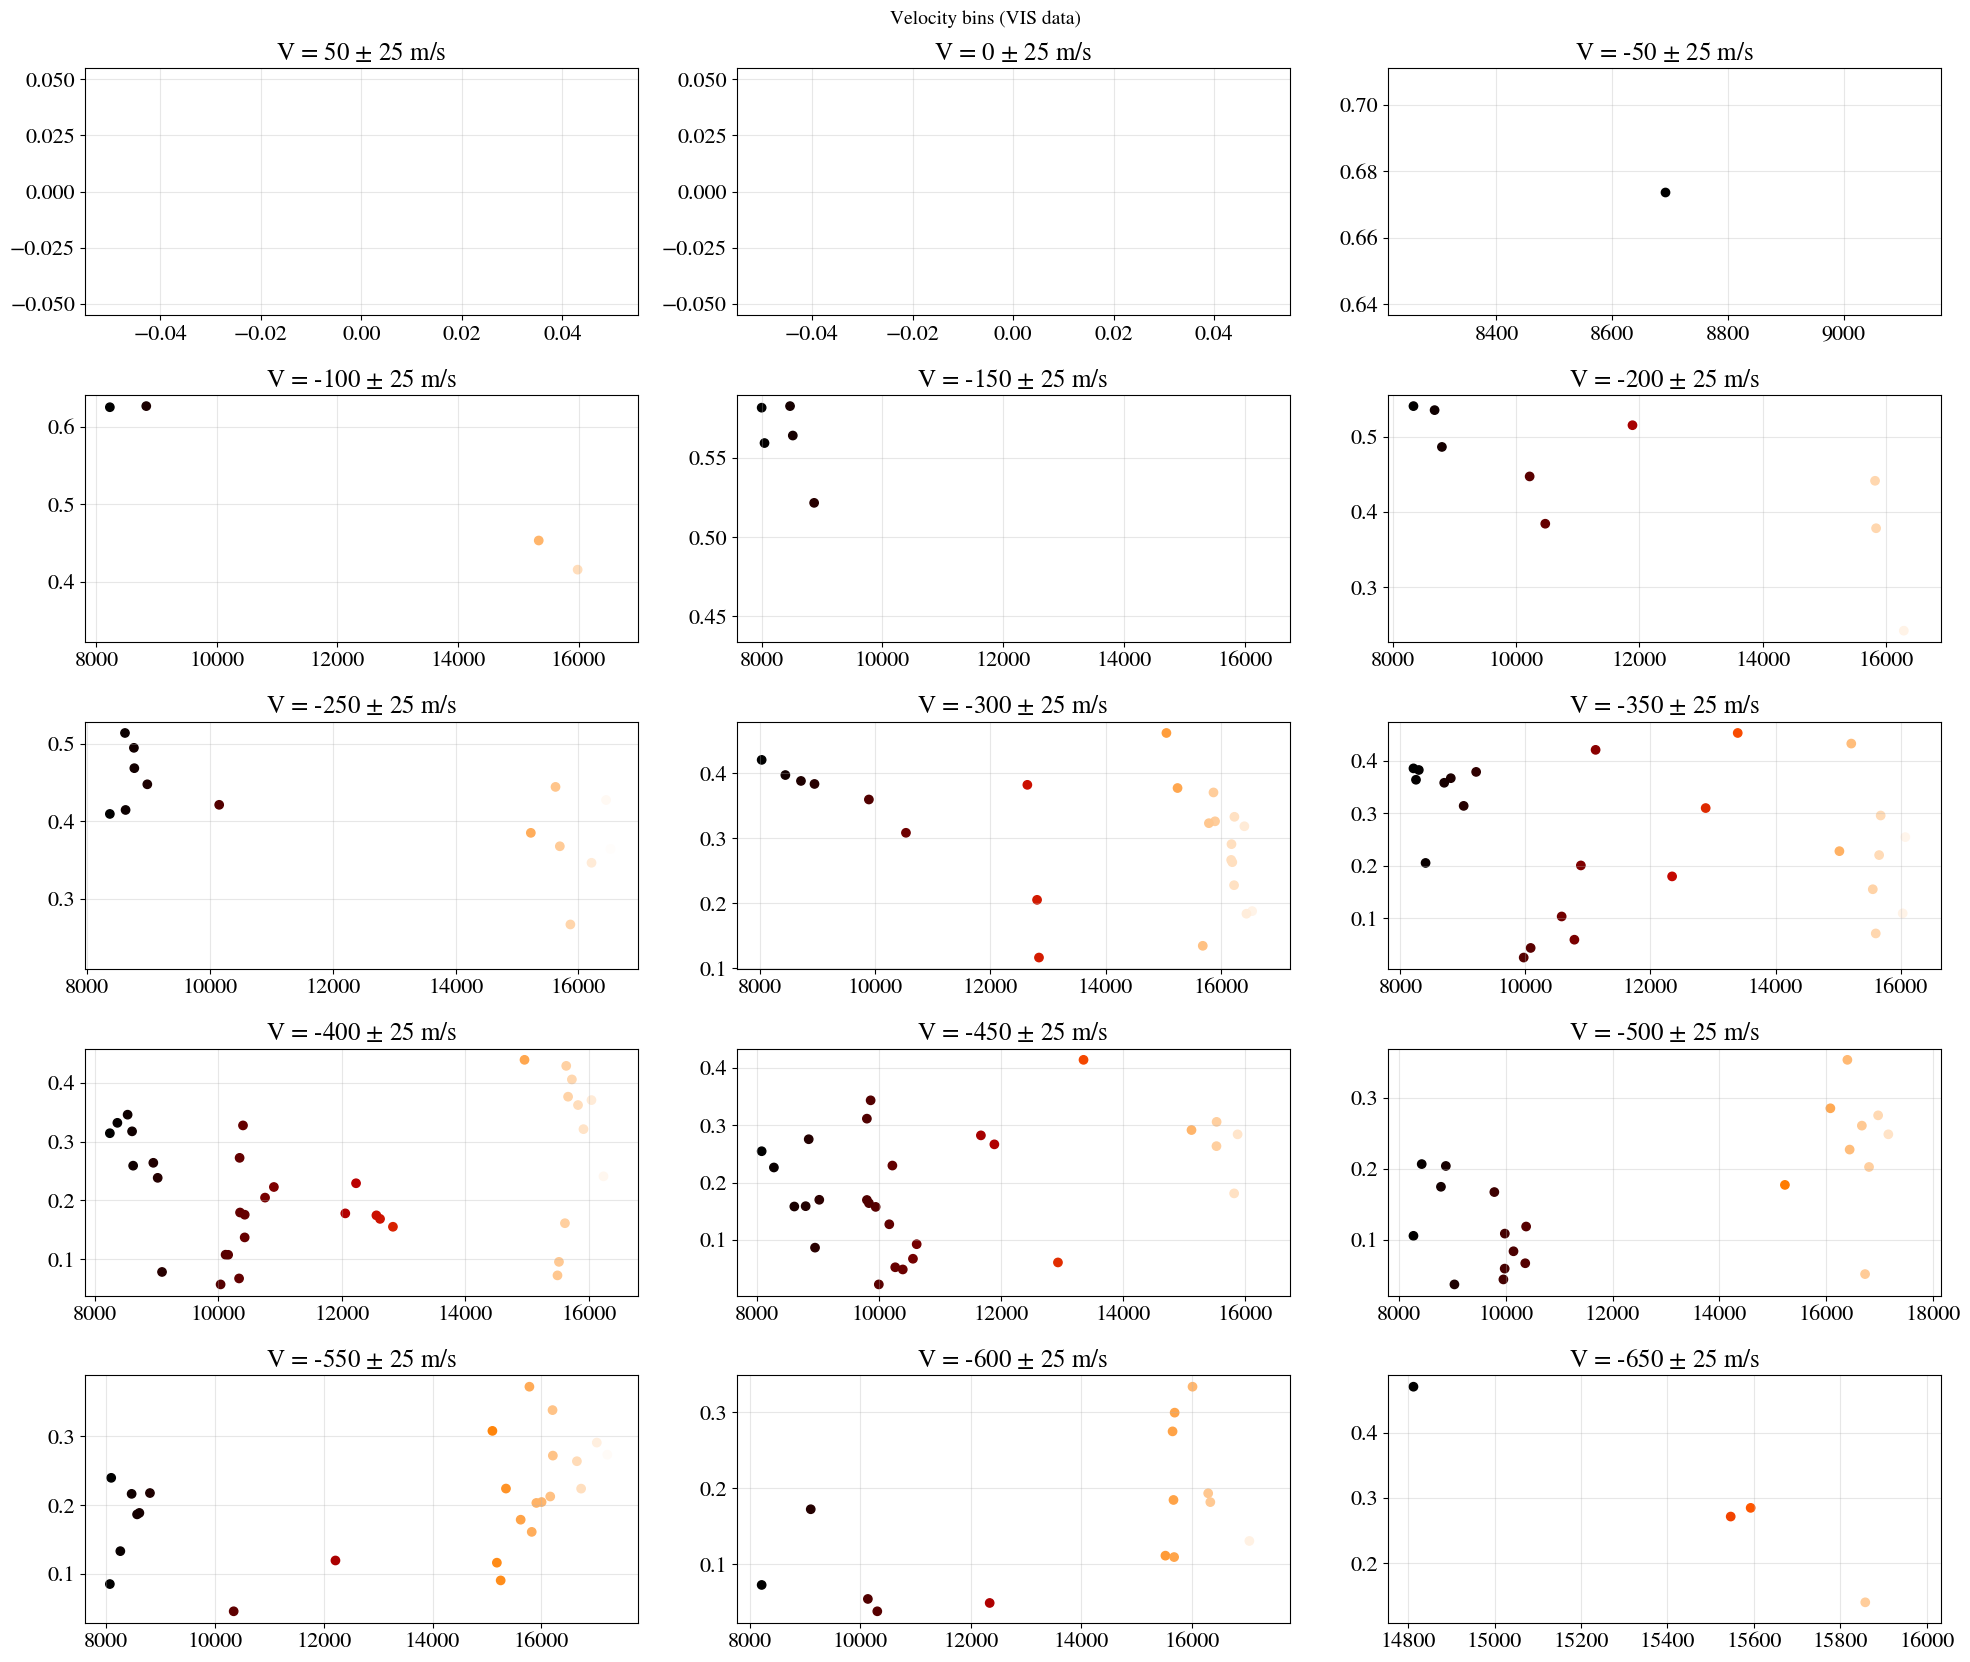

In [108]:
#Organize the dataframe wtih ascending velocities
NIR_listed = NIR_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_NIR = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_NIR.append(NIR_listed[NIR_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_NIR[i]['Observed wavelength'],1-velocity_NIR[i]['Flux'],c=velocity_NIR[i]["Observed wavelength"],cmap='gist_heat')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


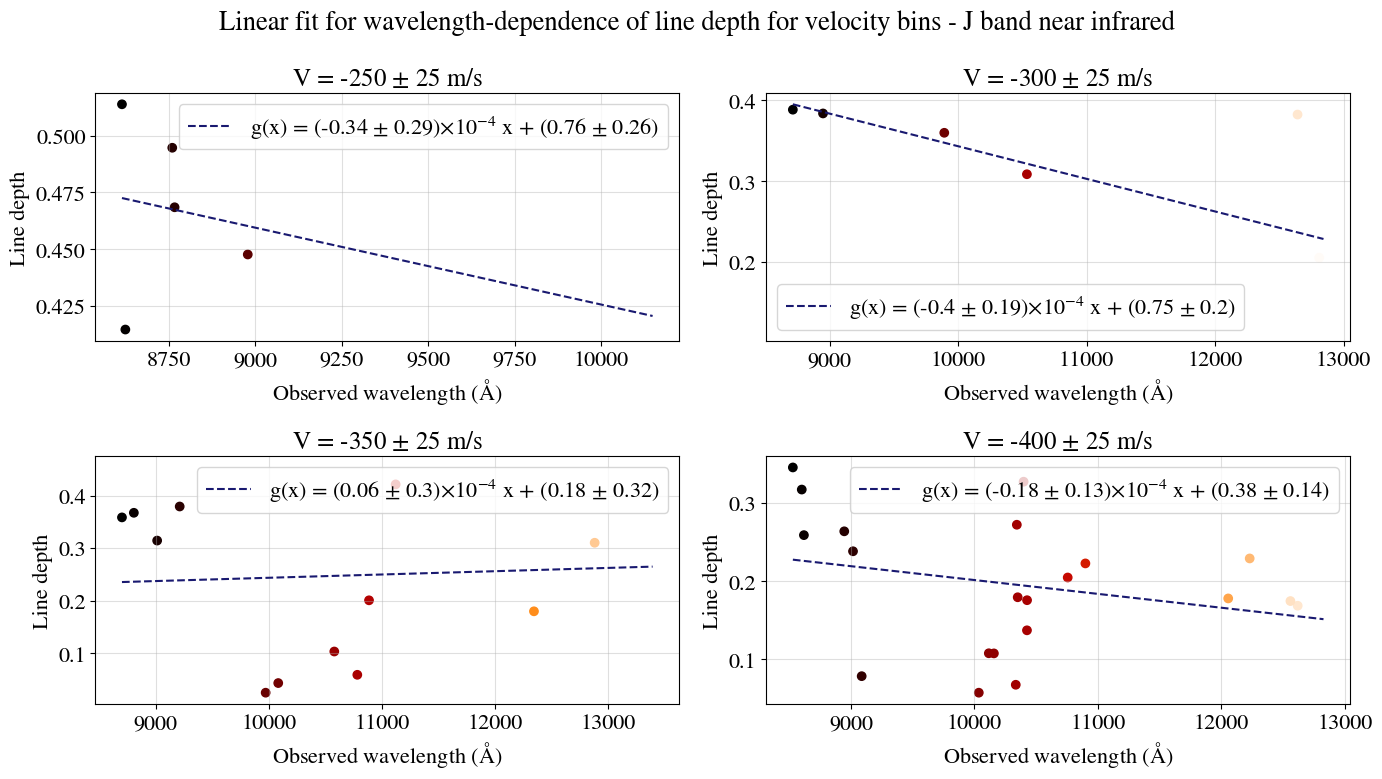

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_NIR = []
values_param_NIR = []
wave_NIR = []
cov_NIR = []
for i in range(6,10):
    new_data = velocity_NIR[i][velocity_NIR[i]['Observed wavelength'].between(8500,14000)]
    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Observed wavelength'], new_data['Line Depth'],1,cov=True)
    values_fit = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))


    cov_NIR.append(pd.DataFrame(error))
    fits_NIR.append([values_fit,fit])
    values_param_NIR.append(pd.DataFrame(param))
    wave_NIR.append(new_data)

markers_new = markers[6:10]

#Parameters and their error
param_NIR_J = pd.concat(values_param_NIR,axis=1).T.reset_index(drop=True)
param_NIR_J.columns = ['Slope','Shift']
param_NIR_J['Error Slope'] = pd.concat(cov_NIR,axis=1).T.reset_index(drop=True)[0]
param_NIR_J['Error Shift'] = pd.concat(cov_NIR,axis=1).T.reset_index(drop=True)[1]
param_NIR_J['Velocity'] = markers_new

fig5, axes = plt.subplots(2, 2, figsize=(14, 8))
fig5.suptitle('Linear fit for wavelength-dependence of line depth for velocity bins - J band near infrared')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_NIR[i]['Observed wavelength'],wave_NIR[i]['Line Depth'],c=wave_NIR[i]['Observed wavelength'],cmap='gist_heat')
        ax.plot(fits_NIR[i][0],fits_NIR[i][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_NIR_J["Slope"].iloc[i]*1e4,2)} $\pm$ {round(param_NIR_J["Error Slope"].iloc[i]*1e4,2)})$\times 10^{{-4}}$ x + ({round(param_NIR_J["Shift"].iloc[i],2)} $\pm$ {round(param_NIR_J["Error Shift"].iloc[i],2)})')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_ylabel(r'Line depth')
        ax.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$')
        ax.grid(alpha=0.4)
        ax.legend()

    else:
        ax.set_visible(False)

fig5.tight_layout()
plt.show()

# fig5.savefig('Velocity bins NIR J')

In [110]:
param_NIR_J

,Slope,Shift,Error Slope,Error Shift,Velocity
0,-0.000034,0.764145,0.000029,0.263736,-250
1,-0.000040,0.746031,0.000019,0.204652,-300
2,0.000006,0.181116,0.000030,0.319282,-350
3,-0.000018,0.378675,0.000013,0.139112,-400


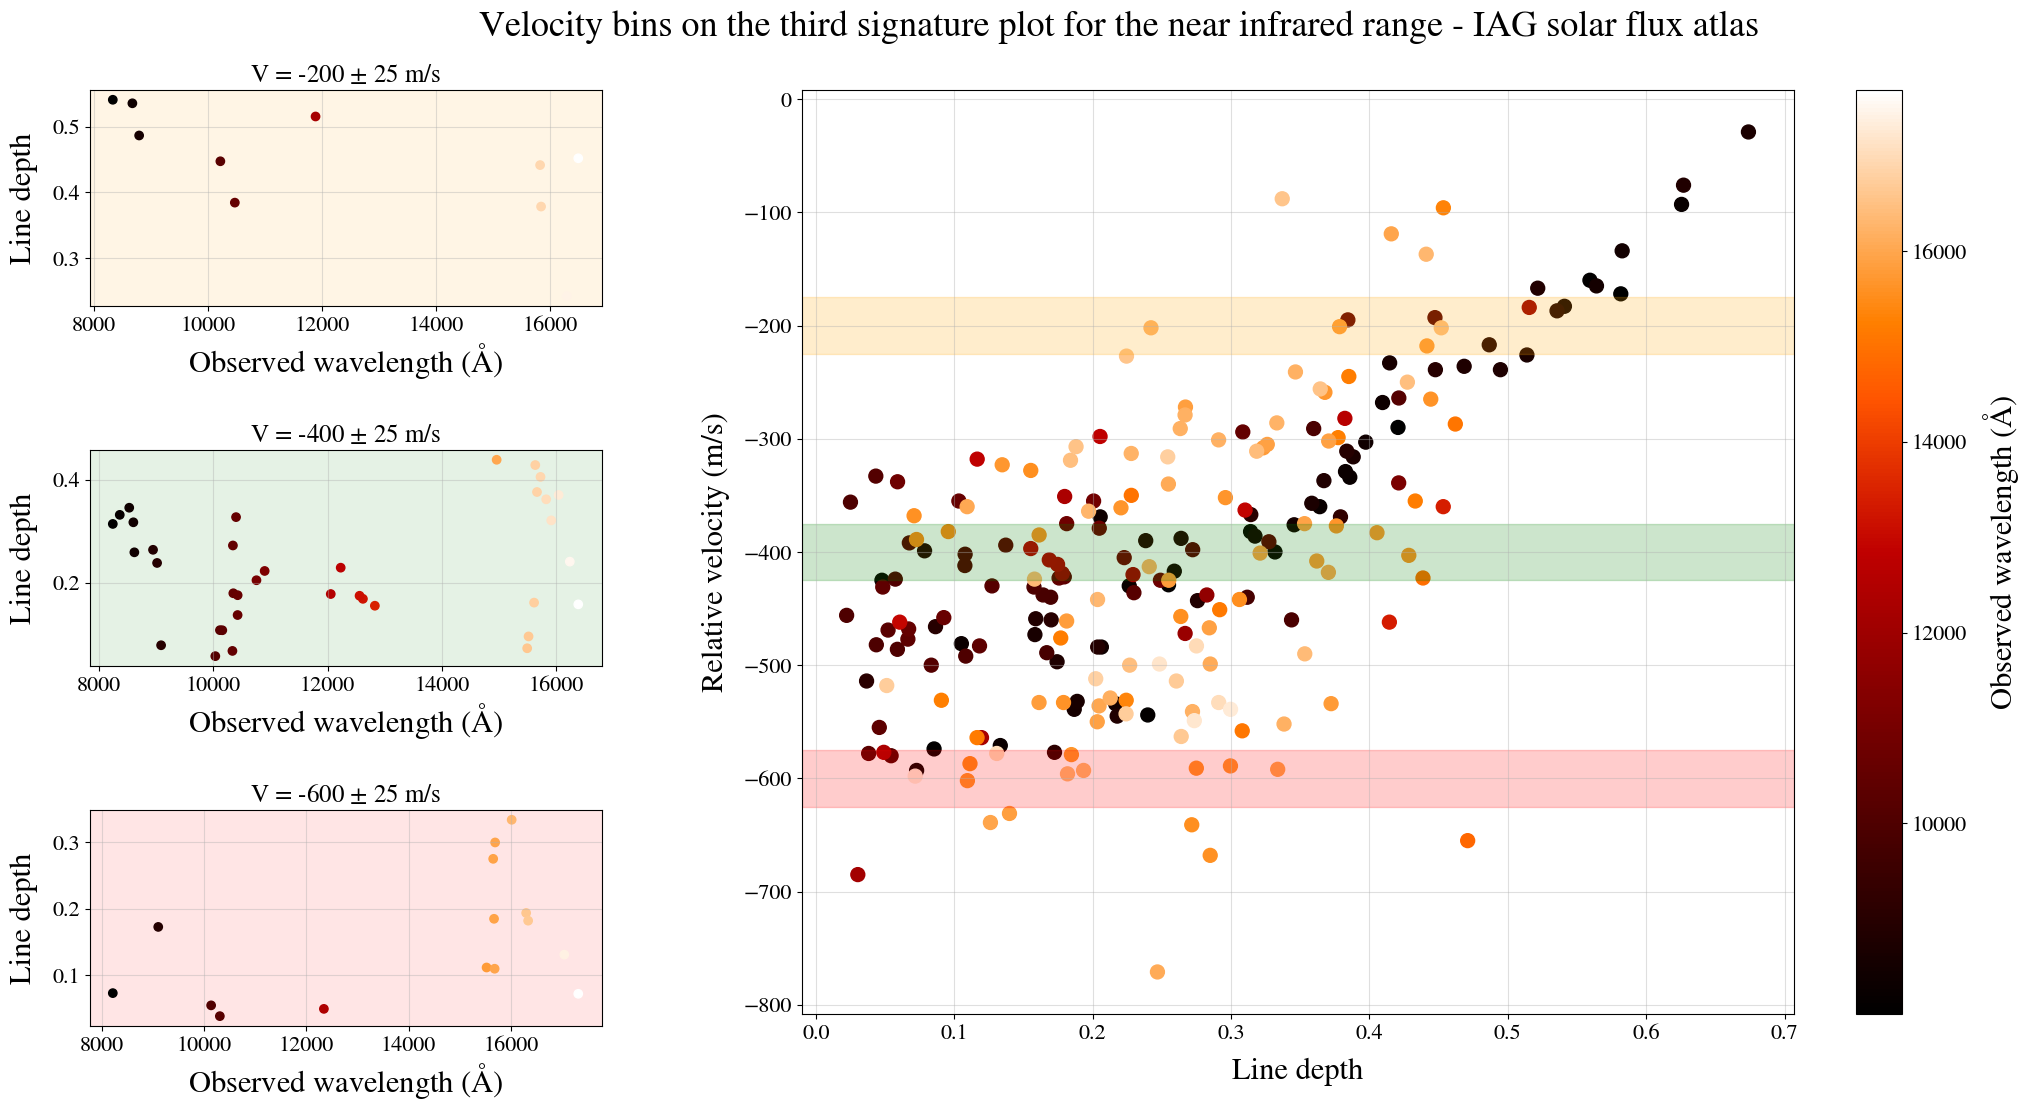

In [111]:
#Another form to graph
# Crear figura principal
fig, ax = plt.subplots(figsize=(16, 12))
scatter = ax.scatter(NIR_data['Line Depth'],NIR_data['Velocity'],c=NIR_data["Observed wavelength"],cmap='gist_heat',lw=1,marker='o',s=100)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10,fontsize=22)

ax.set_title('Velocity bins on the third signature plot for the near infrared range - IAG solar flux atlas',fontsize=26,x=0.32, y=1.05)
ax.set_xlabel(r'Line depth',labelpad=10,fontsize=22)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10,fontsize=22)
ax.grid(alpha=0.4)

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.32, 0.7, 0.32, 0.18])
ax_insetj = fig.add_axes([-0.32, 0.4, 0.32, 0.18])
ax_insetk = fig.add_axes([-0.32, 0.1, 0.32, 0.18])

# Graficar el zoom en la región de interés
i=5
ax_inseti.scatter(velocity_NIR[i]['Observed wavelength'],velocity_NIR[i]['Line Depth'],c=velocity_NIR[i]["Observed wavelength"],cmap='gist_heat',marker='o')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.set_ylabel(r'Line depth',labelpad=10,fontsize=22)
ax_inseti.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_inseti.grid(alpha=0.4)

j=9
ax_insetj.scatter(velocity_NIR[j]['Observed wavelength'],velocity_NIR[j]['Line Depth'],c=velocity_NIR[j]["Observed wavelength"],cmap='gist_heat',marker='o')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_ylabel(r'Line depth',labelpad=10,fontsize=22)
ax_insetj.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_insetj.grid(alpha=0.4)

k=13
ax_insetk.scatter(velocity_NIR[k]['Observed wavelength'],velocity_NIR[k]['Line Depth'],c=velocity_NIR[k]["Observed wavelength"],cmap='gist_heat',marker='o')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_ylabel(r'Line depth',labelpad=10,fontsize=22)
ax_insetk.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$',fontsize=22)
ax_insetk.grid(alpha=0.4)


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.2, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.2, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.2, color='red')

ax_inseti.set_facecolor(color=('orange', 0.1))
ax_insetj.set_facecolor(color=('green', 0.1))
ax_insetk.set_facecolor(color=('red', 0.1))


# fig.savefig('Velocity bins NIR_plot', bbox_inches='tight')

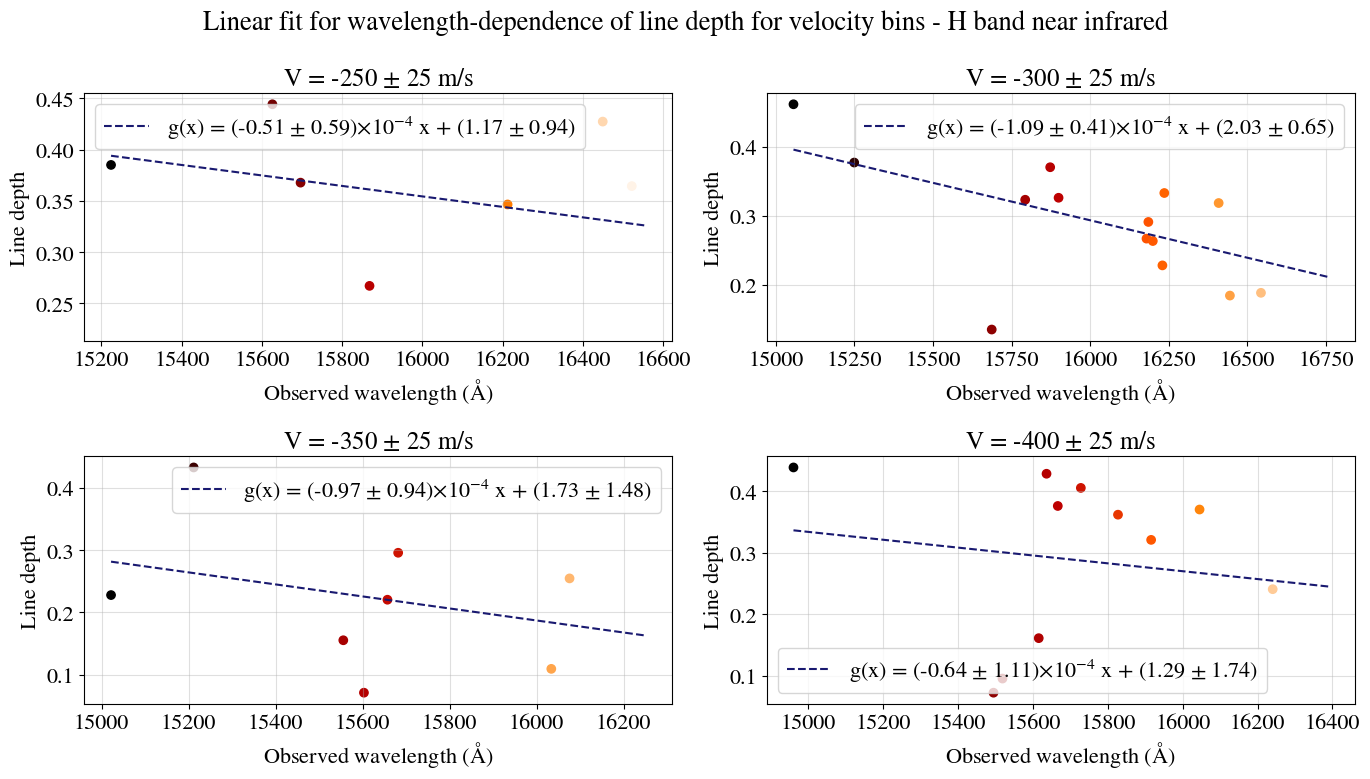

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_NIR = []
values_param_NIR = []
wave_NIR = []
cov_NIR = []

for i in range(6,10):
    new_data = velocity_NIR[i][velocity_NIR[i]['Observed wavelength'] >= 14000]

    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Observed wavelength'],new_data['Line Depth'], 1,cov=True)
    values_fit = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))

    cov_NIR.append(pd.DataFrame(error))
    fits_NIR.append([values_fit,fit])
    values_param_NIR.append(pd.DataFrame(param))
    wave_NIR.append(new_data)

markers_new = markers[6:10]

#Parameters and their error
param_NIR_H = pd.concat(values_param_NIR,axis=1).T.reset_index(drop=True)
param_NIR_H.columns = ['Slope','Shift']
param_NIR_H['Error Slope'] = pd.concat(cov_NIR,axis=1).T.reset_index(drop=True)[0]
param_NIR_H['Error Shift'] = pd.concat(cov_NIR,axis=1).T.reset_index(drop=True)[1]
param_NIR_H['Velocity'] = markers_new

fig5, axes = plt.subplots(2, 2, figsize=(14, 8))
fig5.suptitle('Linear fit for wavelength-dependence of line depth for velocity bins - H band near infrared')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_NIR[i]['Observed wavelength'],wave_NIR[i]['Line Depth'],c=wave_NIR[i]['Observed wavelength'],cmap='gist_heat')
        ax.plot(fits_NIR[i][0],fits_NIR[i][1],linestyle='--',color='midnightblue',
                label=rf'g(x) = ({round(param_NIR_H["Slope"].iloc[i]*1e4,2)} $\pm$ {round(param_NIR_H["Error Slope"].iloc[i]*1e4,2)})$\times 10^{{-4}}$ x + ({round(param_NIR_H["Shift"].iloc[i],2)} $\pm$ {round(param_NIR_H["Error Shift"].iloc[i],2)})')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_ylabel(r'Line depth')
        ax.set_xlabel(r'Observed wavelength $(\mathrm{\AA})$')
        ax.grid(alpha=0.4)
        ax.legend()

    else:
        ax.set_visible(False)

fig5.tight_layout()
plt.show()

# fig5.savefig('Velocity bins NIR H')

In [113]:
param_NIR_H

,Slope,Shift,Error Slope,Error Shift,Velocity
0,-0.000051,1.172535,0.000059,0.942431,-250
1,-0.000109,2.033743,0.000041,0.651703,-300
2,-0.000097,1.733869,0.000094,1.476989,-350
3,-0.000064,1.292224,0.000111,1.742138,-400


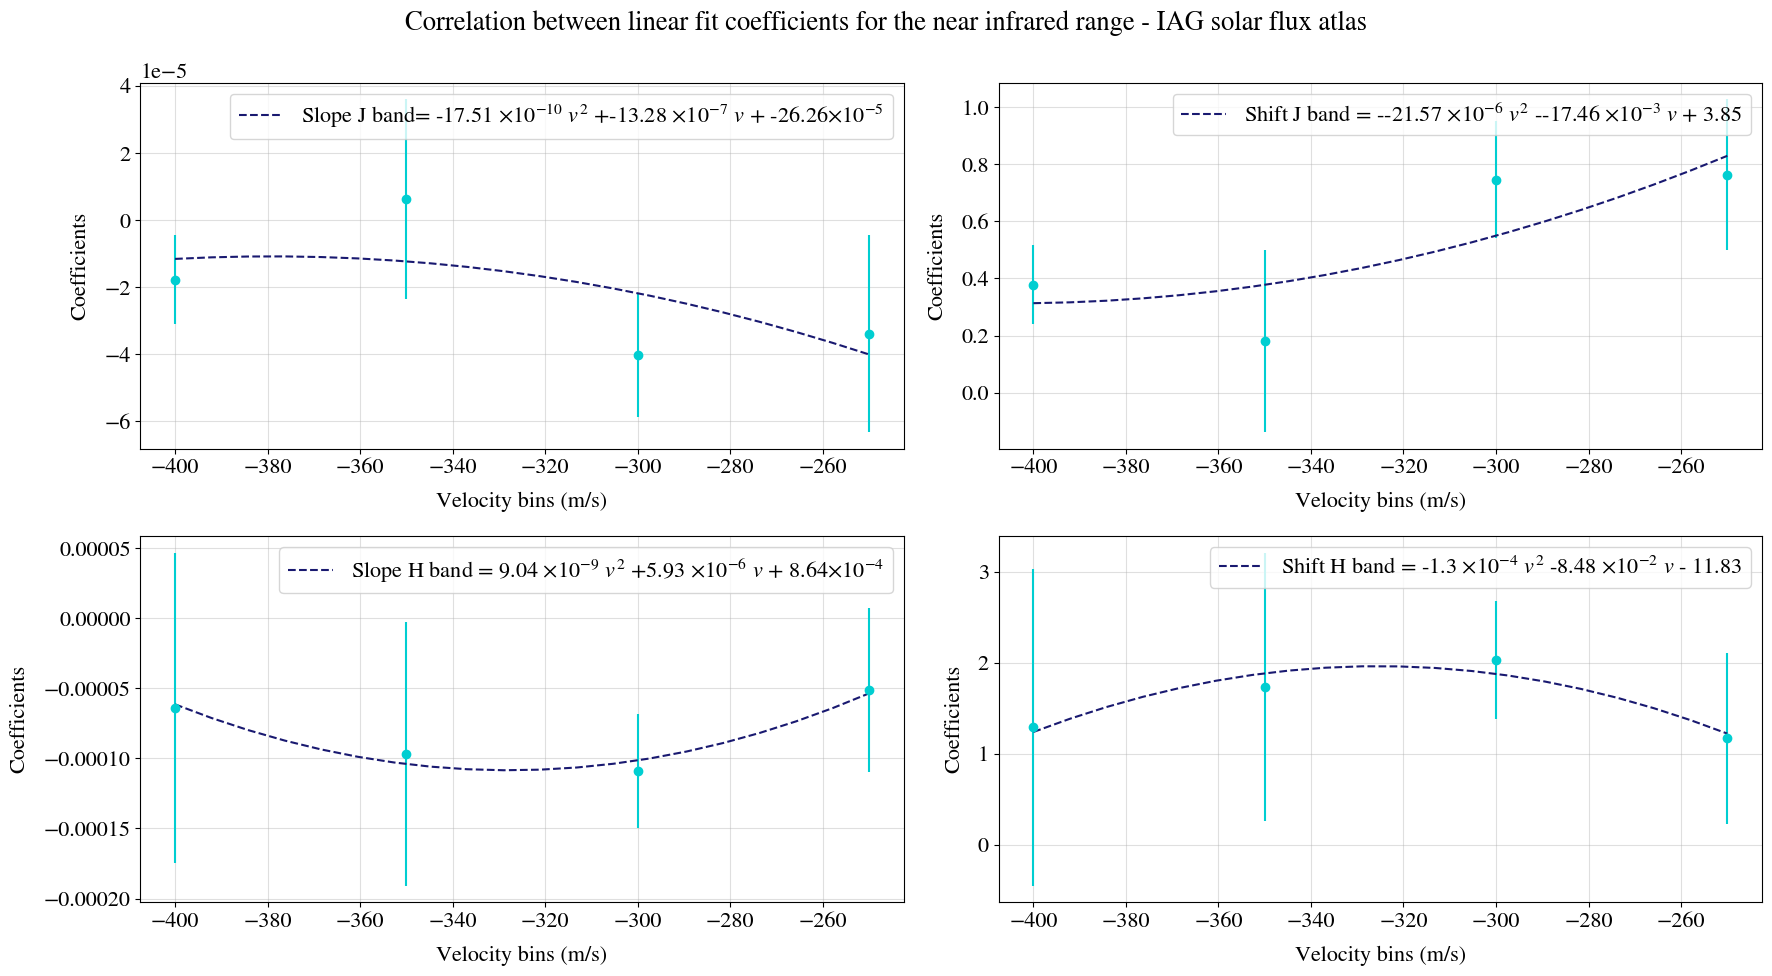

In [ ]:
fig3, axes = plt.subplots(2,2,figsize=(18,10))
ax1 = axes[0,0]
ax2 = axes[0,1]
ax3 = axes[1,0]
ax4 = axes[1,1]

ax1.errorbar(param_NIR_J['Velocity'],param_NIR_J['Slope'],yerr=param_NIR_J['Error Slope'],fmt='o',c='darkturquoise')
ax2.errorbar(param_NIR_J['Velocity'],param_NIR_J['Shift'],yerr=param_NIR_J['Error Shift'],fmt='o',c='darkturquoise')

#Made a polynomial first order fit
param1, cov1 = np.polyfit(param_NIR_J['Velocity'],param_NIR_J['Slope'], 2,cov=True)
values_fit1 = np.linspace(min(param_NIR_J['Velocity']), max(param_NIR_J['Velocity']), 20)
fit1 = np.polyval(param1,values_fit1)

ax1.plot(values_fit1,fit1,linestyle='--',c='midnightblue',label=rf'Slope J band= {round(param1[0]*1e10,2)} $\times 10^{{-10}}$ $v^2$ +{round(param1[1]*1e7,2)} $\times 10^{{-7}}$ $v$ + {round(param1[2]*1e5,2)}$\times 10^{{-5}}$')

# Made a polynomial first order fit
param2, cov2 = np.polyfit(param_NIR_J['Velocity'] ,param_NIR_J['Shift'], 2,cov=True)
values_fit2 = np.linspace(min(param_NIR_J['Velocity']), max(param_NIR_J['Velocity']), 20)
fit2 = np.polyval(param2,values_fit2)

ax2.plot(values_fit2,fit2,linestyle='--',c='midnightblue',label=rf'Shift J band = -{round(param2[0]*-1e6,2)} $\times 10^{{-6}}$ $v^2$ -{round(param2[1]*-1e3,2)} $\times 10^{{-3}}$ $v$ + {round(param2[2],2)}')


ax3.errorbar(param_NIR_H['Velocity'],param_NIR_H['Slope'],yerr=param_NIR_H['Error Slope'],fmt='o',c='darkturquoise')
ax4.errorbar(param_NIR_H['Velocity'],param_NIR_H['Shift'],yerr=param_NIR_H['Error Shift'],fmt='o',c='darkturquoise')

param3, cov3 = np.polyfit(param_NIR_H['Velocity'],param_NIR_H['Slope'], 2,cov=True)
values_fit3 = np.linspace(min(param_NIR_H['Velocity']), max(param_NIR_H['Velocity']), 20)
fit3 = np.polyval(param3,values_fit3)

ax3.plot(values_fit3,fit3,linestyle='--',c='midnightblue',label=rf'Slope H band = {round(param3[0]*1e9,2)} $\times 10^{{-9}}$ $v^2$ +{round(param3[1]*1e6,2)} $\times 10^{{-6}}$ $v$ + {round(param3[2]*1e4,2)}$\times 10^{{-4}}$')

# Made a polynomial first order fit
param4, cov4 = np.polyfit(param_NIR_H['Velocity'] ,param_NIR_H['Shift'], 2,cov=True)
values_fit4 = np.linspace(min(param_NIR_H['Velocity']), max(param_NIR_H['Velocity']), 20)
fit4 = np.polyval(param4,values_fit4)

ax4.plot(values_fit4,fit4,linestyle='--',c='midnightblue',label=rf'Shift H band = -{round(param4[0]*-1e4,2)} $\times 10^{{-4}}$ $v^2$ -{round(param4[1]*-1e2,2)} $\times 10^{{-2}}$ $v$ - {round(param4[2]*-1,2)}')

fig3.suptitle('Correlation between linear fit coefficients for the near infrared range - IAG solar flux atlas')

ax1.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax2.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax3.set_xlabel(r'Velocity bins (m/s)',labelpad=10)
ax4.set_xlabel(r'Velocity bins (m/s)',labelpad=10)

ax1.set_ylabel(r'Coefficients',labelpad=10)
ax2.set_ylabel(r'Coefficients',labelpad=10)
ax3.set_ylabel(r'Coefficients',labelpad=10)
ax4.set_ylabel(r'Coefficients',labelpad=10)

ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
ax3.grid(alpha = 0.4)
ax4.grid(alpha = 0.4)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

fig3.tight_layout()

# fig3.savefig('velocity coeficients NIR')

The rotation is not the reason of chromodependence, when we observe the center disk spectrum and measure the rotation is greater than the full disk integrated atlas.